# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
# file_path= 'data/ECMWF/venezuela/8N67W/dat.csv' # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path = 'data/ECMWF/chile/52S75W/dat.csv' # good
# file_path = 'data/ECMWF/iceland/65N17W/dat.csv' # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
file_path= 'data/ECMWF/sudan/18N32E/dat.csv' # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 5 

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'd:/data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48.75N98.25W/dat.csv' # Olga, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# US offshore
# file_path = 'D:/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = True
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [4]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df

time  lat  lon         x         y     speed         dir  \
0     1979-01-01 00:00:00   18   32 -0.562815  4.334253  4.370642   97.398624   
1     1979-01-01 06:00:00   18   32 -0.998787  4.135107  4.254020  103.579040   
2     1979-01-01 12:00:00   18   32 -0.212544  5.696335  5.700299   92.136854   
3     1979-01-01 18:00:00   18   32 -1.160853  4.393297  4.544077  104.801149   
4     1979-01-02 00:00:00   18   32 -0.671674  4.998970  5.043892   97.652570   
5     1979-01-02 06:00:00   18   32 -0.500990  3.834058  3.866651   97.444560   
6     1979-01-02 12:00:00   18   32  0.249044  5.487052  5.492701   87.401262   
7     1979-01-02 18:00:00   18   32 -0.518257  4.517851  4.547479   96.543981   
8     1979-01-03 00:00:00   18   32 -0.513124  4.589771  4.618365   96.379027   
9     1979-01-03 06:00:00   18   32  0.523547  3.798105  3.834019   82.151563   
10    1979-01-03 12:00:00   18   32  1.713083  5.014647  5.299183   71.139017   
11    1979-01-03 18:00:00   18   32 -0.111206  4.765781  4.767079   91.336708   
12    1979-01-04 00:00:00   18   32  0.329698  5.461518  5.471461   86.545389   
13    1979-01-04 06:00:00   18   32  0.783968  4.145758  4.219231   79.291737   
14    1979-01-04 12:00:00   18   32  1.048717  6.707679  6.789165   81.113982   
15    1979-01-04 18:00:00   18   32 -0.245030  5.927709  5.932771   92.367049   
16    1979-01-05 00:00:00   18   32  1.415058  6.589078  6.739313   77.879366   
17    1979-01-05 06:00:00   18   32  2.071551  5.632474  6.001341   69.807129   
18    1979-01-05 12:00:00   18   32  3.028724  6.798677  7.442793   65.987637   
19    1979-01-05 18:00:00   18   32  0.479893  6.102202  6.121043   85.503369   
20    1979-01-06 00:00:00   18   32  2.203241  6.127817  6.511867   70.224079   
21    1979-01-06 06:00:00   18   32  1.984919  4.711975  5.112984   67.156750   
22    1979-01-06 12:00:00   18   32  2.240633  5.343188  5.793971   67.249560   
23    1979-01-06 18:00:00   18   32 -0.642531  5.310777  5.349504   96.898472   
24    1979-01-07 00:00:00   18   32  0.516160  5.199475  5.225032   84.330733   
25    1979-01-07 06:00:00   18   32  0.183346  3.688639  3.693193   87.154424   
26    1979-01-07 12:00:00   18   32  1.227484  4.993890  5.142534   76.190623   
27    1979-01-07 18:00:00   18   32 -0.312136  4.652642  4.663101   93.838100   
28    1979-01-08 00:00:00   18   32 -0.943621  4.157667  4.263404  102.787183   
29    1979-01-08 06:00:00   18   32 -0.973787  3.650707  3.778349  104.935305   
...                   ...  ...  ...       ...       ...       ...         ...   
55614 2017-01-24 12:00:00   18   32  5.121974  4.063059  6.537818   38.423574   
55615 2017-01-24 18:00:00   18   32  3.055575  5.085398  5.932774   59.000330   
55616 2017-01-25 00:00:00   18   32  4.567962  3.828090  5.959911   39.964023   
55617 2017-01-25 06:00:00   18   32  3.493557  2.639543  4.378599   37.072720   
55618 2017-01-25 12:00:00   18   32  3.308700  1.441991  3.609270   23.548440   
55619 2017-01-25 18:00:00   18   32  0.490660  3.388327  3.423668   81.760339   
55620 2017-01-26 00:00:00   18   32 -0.005371  3.437715  3.437719   90.089519   
55621 2017-01-26 06:00:00   18   32  1.205133  2.251054  2.553349   61.837002   
55622 2017-01-26 12:00:00   18   32 -0.672664  2.930072  3.006293  102.929493   
55623 2017-01-26 18:00:00   18   32 -2.358452  6.968136  7.356440  108.699025   
55624 2017-01-27 00:00:00   18   32 -0.325048  8.668509  8.674601   92.147448   
55625 2017-01-27 06:00:00   18   32  0.714208  8.249478  8.280337   85.051890   
55626 2017-01-27 12:00:00   18   32  0.119753  8.271492  8.272359   89.170540   
55627 2017-01-27 18:00:00   18   32 -0.923129  7.234271  7.292931   97.271929   
55628 2017-01-28 00:00:00   18   32  0.128459  6.567504  6.568760   88.879449   
55629 2017-01-28 06:00:00   18   32  1.000437  6.156309  6.237068   80.769782   
55630 2017-01-28 12:00:00   18   32  0.297087  7.231949  7.238049   87.647624   
55631 2017-01-28 18:00:00   18   32 -0.005525  6.078

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


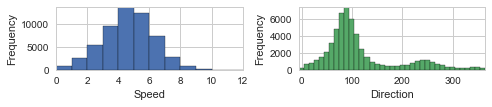

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat      lon             x             y         speed  \
count  55520.0  55520.0  55520.000000  55520.000000  55520.000000   
mean      18.0     32.0      0.078055      2.926408      4.647153   
std        0.0      0.0      2.180001      3.300525      1.618505   
min       18.0     32.0     -7.945488     -9.673088      0.051911   
25%       18.0     32.0     -1.421332      1.420127      3.616021   
50%       18.0     32.0      0.017077      3.873053      4.695897   
75%       18.0     32.0      1.474889      5.193944      5.735860   
max       18.0     32.0      8.966102     11.100170     11.106144   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     117.366961  1.997567e+07    900.000000    171.093413  
std       73.589401  1.096640e+05    670.826435    143.621492  
min        0.032562  1.979010e+07      0.000000      0.001494  
25%       74.131642  1.988070e+07    450.000000     21.532131  
50%       93.995258  1.997567e+07    900.000000    176.960978  
75%      127.997779  2.007070e+07   1350.000000    334.513855  
max      359.982580  2.016123e+07   1800.000000    359.995377

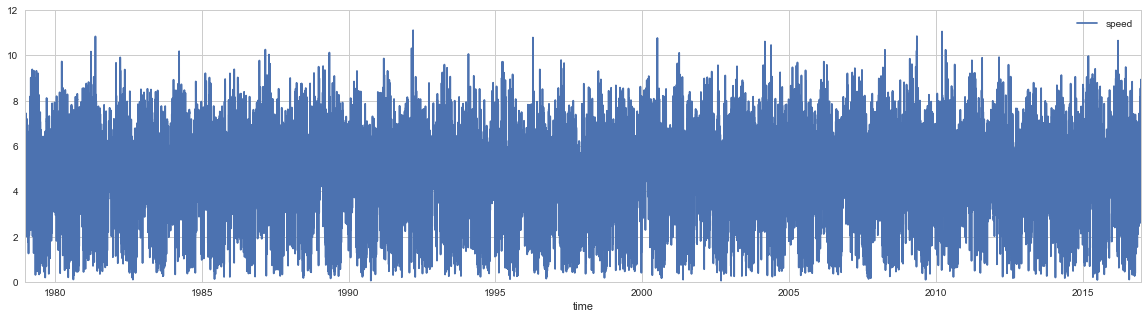

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

In [9]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR = 5
    N_VM_PHI = 2
else:
    N_VM_DIR = 4
    N_VM_PHI = 3

In [10]:
df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


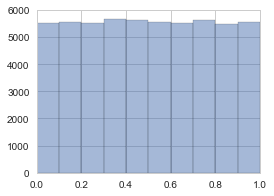

In [11]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [12]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

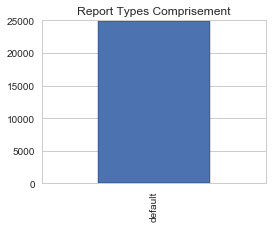

In [13]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

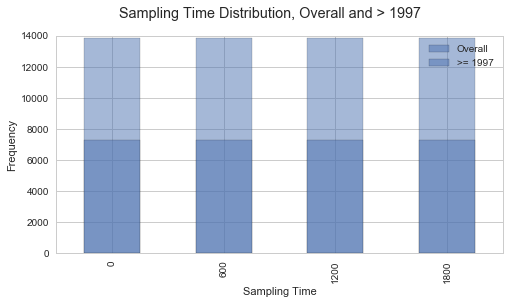

In [14]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [15]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [16]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat  lon         x          y      speed         dir  \
time                                                                        
1992-03-14 12:00:00   18   32  0.364241  11.100170  11.106144    1.879428   
2010-03-18 12:00:00   18   32  0.153018  11.048299  11.049359    0.793493   
2009-05-09 18:00:00   18   32 -1.655610  10.717662  10.844783  351.218648   
2010-03-18 06:00:00   18   32 -0.597499  10.822845  10.839326  356.840069   
1981-05-20 06:00:00   18   32  0.559031  10.818463  10.832897    2.958061   
1996-04-12 12:00:00   18   32 -1.674953  10.652686  10.783561  351.064371   
2000-07-08 06:00:00   18   32 -5.072732  -9.493402  10.763702  208.117502   
2016-03-15 12:00:00   18   32  1.773581  10.499973  10.648710    9.587501   
2004-03-06 12:00:00   18   32 -1.330928  10.523990  10.607815  352.792291   
2004-05-22 00:00:00   18   32  5.172303   9.084084  10.453387   29.656355   

                         date  HrMn     type wind_type  dir_windrose  \
time                                                                   
1992-03-14 12:00:00  19920314  1200  default   default      1.879428   
2010-03-18 12:00:00  20100318  1200  default   default      0.793493   
2009-05-09 18:00:00  20090509  1800  default   default    351.218648   
2010-03-18 06:00:00  20100318   600  default   default    356.840069   
1981-05-20 06:00:00  19810520   600  default   default      2.958061   
1996-04-12 12:00:00  19960412  1200  default   default    351.064371   
2000-07-08 06:00:00  20000708   600  default   default    208.117502   
2016-03-15 12:00:00  20160315  1200  default   default      9.587501   
2004-03-06 12:00:00  20040306  1200  default   default    352.792291   
2004-05-22 00:00:00  20040522     0  default   default     29.656355   

                        incre  incre_reverse  
time                                          
1992-03-14 12:00:00  2.204351       4.126568  
2010-03-18 12:00:00  0.210033       2.235204  
2009-05-09 18:00:00  0.832310       2.816325  
2010-03-18 06:00:00  1.579974      -0.210033  
1981-05-20 06:00:00  2.457443       2.286324  
1996-04-12 12:00:00  2.740138       2.942743  
2000-07-08 06:00:00  2.313506       2.166031  
2016-03-15 12:00:00  2.601504       0.691906  
2004-03-06 12:00:00  0.601041       1.360521  
2004-05-22 00:00:00  2.258065       0.620223

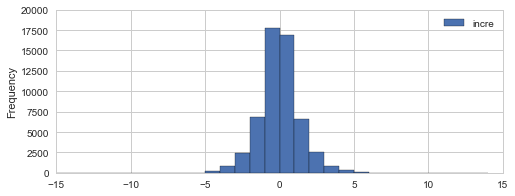

In [17]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [18]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


lat  lon         x          y      speed         dir  \
time                                                                        
1992-03-14 12:00:00   18   32  0.364241  11.100170  11.106144    1.879428   
2010-03-18 12:00:00   18   32  0.153018  11.048299  11.049359    0.793493   
2009-05-09 18:00:00   18   32 -1.655610  10.717662  10.844783  351.218648   
2010-03-18 06:00:00   18   32 -0.597499  10.822845  10.839326  356.840069   
1981-05-20 06:00:00   18   32  0.559031  10.818463  10.832897    2.958061   
1996-04-12 12:00:00   18   32 -1.674953  10.652686  10.783561  351.064371   
2000-07-08 06:00:00   18   32 -5.072732  -9.493402  10.763702  208.117502   
2016-03-15 12:00:00   18   32  1.773581  10.499973  10.648710    9.587501   
2004-03-06 12:00:00   18   32 -1.330928  10.523990  10.607815  352.792291   
2004-05-22 00:00:00   18   32  5.172303   9.084084  10.453387   29.656355   

                         date  HrMn     type wind_type  dir_windrose  \
time                                                                   
1992-03-14 12:00:00  19920314  1200  default   default      1.879428   
2010-03-18 12:00:00  20100318  1200  default   default      0.793493   
2009-05-09 18:00:00  20090509  1800  default   default    351.218648   
2010-03-18 06:00:00  20100318   600  default   default    356.840069   
1981-05-20 06:00:00  19810520   600  default   default      2.958061   
1996-04-12 12:00:00  19960412  1200  default   default    351.064371   
2000-07-08 06:00:00  20000708   600  default   default    208.117502   
2016-03-15 12:00:00  20160315  1200  default   default      9.587501   
2004-03-06 12:00:00  20040306  1200  default   default    352.792291   
2004-05-22 00:00:00  20040522     0  default   default     29.656355   

                        incre  incre_reverse  
time                                          
1992-03-14 12:00:00  2.204351       4.126568  
2010-03-18 12:00:00  0.210033       2.235204  
2009-05-09 18:00:00  0.832310       2.816325  
2010-03-18 06:00:00  1.579974      -0.210033  
1981-05-20 06:00:00  2.457443       2.286324  
1996-04-12 12:00:00  2.740138       2.942743  
2000-07-08 06:00:00  2.313506       2.166031  
2016-03-15 12:00:00  2.601504       0.691906  
2004-03-06 12:00:00  0.601041       1.360521  
2004-05-22 00:00:00  2.258065       0.620223

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [19]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.001494      1
0.004523      1
0.004870      1
0.005983      1
0.006994      1
0.008187      1
0.008404      1
0.009499      1
0.013676      1
0.013874      1
0.016269      1
0.016649      1
0.017516      1
0.018737      1
0.019454      1
0.021049      1
0.021877      1
0.022686      1
0.026654      1
0.027767      1
0.027894      1
0.028911      1
0.030788      1
0.031066      1
0.032214      1
0.033658      1
0.036625      1
0.038691      1
0.039650      1
0.041089      1
             ..
359.960337    1
359.960522    1
359.960752    1
359.965446    1
359.965786    1
359.966823    1
359.968441    1
359.969532    1
359.969956    1
359.970620    1
359.972256    1
359.975022    1
359.975820    1
359.976490    1
359.977462    1
359.978404    1
359.978866    1
359.982835    1
359.983924    1
359.986058    1
359.986452    1
359.987686    1
359.989735    1
359.990014    1
359.990557    1
359.991330    1
359.992484    1
359.994426    1
359.994563    1
359.995377    1
Name: dir, dtype: int64

0 10


In [20]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [21]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.012263289984


Series([], Name: speed, dtype: int64)


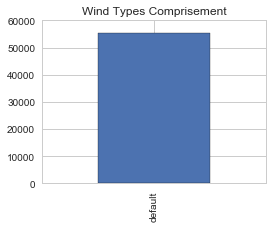

In [22]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


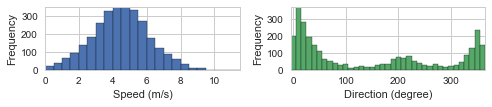

1981 - 1985


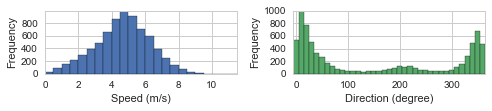

1986 - 1990


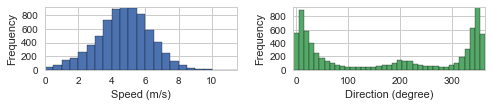

1991 - 1995


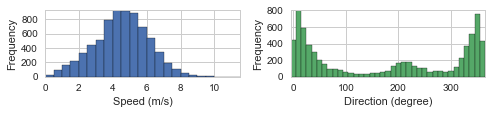

1996 - 2000


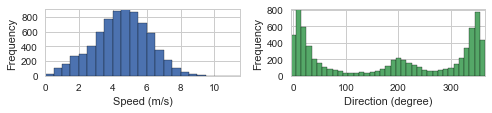

2001 - 2005


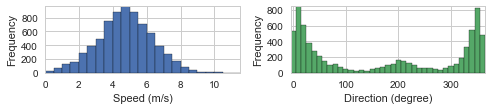

2006 - 2010


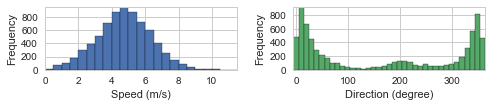

2011 - 2015


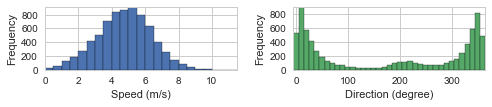

2016 - 2016


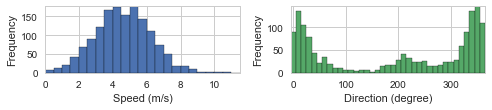

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

(0, 6.5)

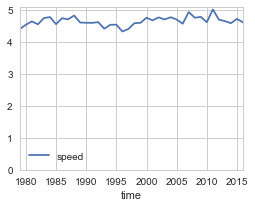

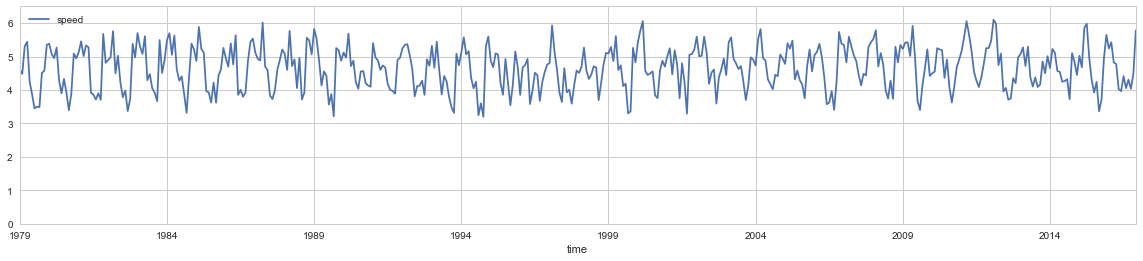

In [25]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
# %%time
# for column in ['speed', 'dir']:
#     if column == 'speed':
#         bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
#     else:
#         bins = arange(0, 361, 10)
#     den, _ = np.histogram(df[column], bins=bins, density=True)
#     y_top=max(den)*1.2
#     for year in arange(1980, 2016):
#         end_year = year
#         sub_df = df[str(year):str(end_year)]
#         if len(sub_df) > 1000:
#             plt.figure()
#             df[column].hist(bins=bins, alpha=0.3, normed=True)
#             sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
#             plt.gca().set_ylim(top=y_top)
#             plt_configure(title=str(year))
#     align_figures()

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUgAAADECAYAAAD9EbgkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFHZJREFUeJzt3XtMU/ffB/B3gYFSbmOZyfIwDTBJNIQ4daJBvCRT9A8z
x5hKF5zxkkkIDuOwiFhmvGCzjXnZGN4Sk0JlbLhpfi5bJltExRDDvEyCM+uPNQGEIfIoVSylPc8f
e+zG3OGcMg7tKe/XX7aelk879va053vOWyMIggAiInpKgLcHICLyVQxIIiIRDEgiIhEMSCIiEQxI
IiIRDEgiIhFBUhs4HA4UFBSgra0NAQEB2LVrF4KCglBQUACNRoPJkyejuLgYAQEBqK6uRlVVFYKC
gpCdnY2FCxfi8ePHyM/PR3d3N7RaLYxGI6Kjo0fjtRER/SuSe5Dnz5/HwMAAqqqqkJOTg/3796Ok
pAR5eXkwm80QBAG1tbXo6uqCyWRCVVUVjh8/jtLSUvT39+PkyZNISEiA2WzG8uXLUVZWNhqvi4jo
X5MMyNjYWDidTrhcLthsNgQFBaGpqQmzZs0CAMybNw/19fW4ceMGXn75ZQQHByM8PBwTJ07ErVu3
0NjYiNTUVPe2ly9fVvYVERGNEMmP2KGhoWhra8PSpUvR09OD8vJyXLlyBRqNBgCg1WrR29sLm82G
8PBw9+O0Wi1sNtug+59sK6WxsXG4r4eIaEgzZsyQva1kQJ44cQJz587Fli1bcOfOHbz99ttwOBzu
v3/48CEiIiIQFhaGhw8fDro/PDx80P1Pth3pF+ErGhsbVTk3oN7Z1To3oN7Z1To34PnOl+RH7IiI
CPceYGRkJAYGBjB16lQ0NDQAAOrq6jBz5kwkJSWhsbERdrsdvb29sFgsSEhIwPTp03H+/Hn3tmp9
Y4lo7JHcg1yzZg0KCwuh0+ngcDiwefNmJCYmYseOHSgtLUVcXBzS0tIQGBiIrKws6HQ6CIKAzZs3
IyQkBJmZmdDr9cjMzMQzzzyDjz76aDReFxHRvyYZkFqtFgcOHHjq/oqKiqfuW7FiBVasWDHovvHj
x+PgwYP/YkQiIu/gQnEiIhEMSCIiEQxIIiIRDEgiIhEMSCIiEQxIIiIRDEgiIhEMSCIiEQxIIiIR
DEgiIhEMSCIiEQxIIiIRDEgiIhGSV/M5deoUvvrqKwCA3W5Hc3MzzGYz9u7dy9KuMcjpdMJisXj0
mPj4eAQGBio0EZFyJAMyPT0d6enpAICdO3fijTfewKeffoq8vDwkJyfDYDCgtrYW06ZNg8lkQk1N
Dex2O3Q6HVJSUtylXbm5uTh79izKyspQVFSk+AsjZVgsFmRtMyM0coKs7R/d/x2mEh0SEhIUnoxo
5EkG5BM///wzfv31VxQXF+OTTz4ZVNp16dIlBAQEuEu7goODB5V2rV+/3r2t3FZDtfbSqHVuQN7s
VqsVoZETEPbs/8h+3ps3b8rqIhouf3/PfZFa5/aU7IA8fPgwcnJyAACCICha2gWwk2a0yZ09PDwc
+E+HR8+dmJio2B7kWHjPfY1a5wYU6KQBgAcPHqClpQWzZ8/+40EBfz5MqdIuIiJvkxWQV65cwZw5
c9y3WdpFRGOBrI/YLS0tiImJcd/W6/Us7SJZBJcLLS0tHj2GR73JV8gKyCcHWZ6IjY1laRfJ0tfb
BcORuwiNlLc0iEe9yZfIPkhD/svpdMJqtQ46yCbG071BAB4f9SbyFQxIgsVigbHyBkIjpY9Od7c2
47mYKaMwFZH3MSAJgPy9vEf3O0dhGiLfwHOxiYhEMCCJiEQwIImIRDAgiYhEMCCJiEQwIImIRDAg
iYhEMCCJiEQwIImIRMg6k+bw4cP44Ycf4HA4kJmZiVmzZqGgoICdNETk1yT3IBsaGnD16lWcPHkS
JpMJHR0dKCkpQV5eHsxmMwRBQG1tLbq6umAymVBVVYXjx4+jtLQU/f397k4as9mM5cuXy65cICLy
Nsk9yIsXLyIhIQE5OTmw2WzYunUrqqur2UkjQo1zW61Wb48wiKcdNmp8z59Q6+xqndtTkgHZ09OD
9vZ2lJeXo7W1FdnZ2eykEaHWro7h9MwoyZMOG7W+54B6Z1fr3IDnwS4ZkFFRUYiLi0NwcDDi4uIQ
EhKCjo4//2diJw0R+SvJ7yBnzJiBCxcuQBAEdHZ2oq+vD3PmzGEnDRH5Pck9yIULF+LKlSvIyMiA
IAgwGAyIiYlhJw0R+T1Zy3y2bt361H3spCEif8eF4kREIhiQREQi2Enjh5xOJywWeTWrwPCaCpXi
aY+20+lUcBoa6xiQfshisSBrmxmhkRNkbe9LTYWe9Gg/uv879G8luU9aIBppDEg/5UkXta81FbJH
m3wFv4MkIhLBgCQiEsGAJCISwYAkIhLBgCQiEsGAJCISwYAkIhIhax3k66+/jrCwMABATEwMNm7c
yE4aIvJ7kgFpt9shCAJMJpP7vo0bNyIvLw/JyckwGAyora3FtGnTYDKZUFNTA7vdDp1Oh5SUFHcn
TW5uLs6ePYuysjIUFRUp+qKIiEaC5EfsW7duoa+vD2vXrsXq1atx7do1NDU1Deqkqa+vx40bN9yd
NOHh4YM6aVJTU93bXr58WdlXREQ0QiT3IMeNG4d169bhzTffxG+//YYNGzaMSieNWkuBfGFuXyvh
UpovvOfDpdbZ1Tq3pyQDMjY2FpMmTYJGo0FsbCyioqLQ1NTk/nulOmnUWM3gK2VGvlbCpTRfeM+H
w1d+Xzyl1rkBz4Nd8iP2l19+iX379gEAOjs7YbPZkJKSwk4aIvJ7knuQGRkZ2LZtGzIzM6HRaLB3
7148++yz7KQhIr8nGZDBwcH/GGrspCEif8eF4kREIhiQREQiGJBERCIYkEREIhiQREQiGJBERCLY
akiqJbhcaG9vx+3bt2U/Jj4+HoGBgQpORf6EAUmq1dfbBdOPGtT8dE7W9o/u/w5TiQ4JCQkKT0b+
ggFJqsYObVISv4MkIhLBgCQiEsGAJCISwYAkIhIhKyC7u7sxf/58WCwWWK1WZGZmQqfTobi4GC6X
CwBQXV2N9PR0rFixAj/++CMA4PHjx8jNzYVOp8OGDRtw79495V4JEdEIkzyK7XA4YDAYMG7cOABA
SUkJC7tGmdPphMVikb19S0uLgtMQjR2SAWk0GrFq1SocOXIEAJ4q7Lp06RICAgLchV3BwcGDCrvW
r1/v3rasrEz2YGrtvFBibqvVCmPlDYRGTpC1fXdrM56LmTLic/iDmzdvyu5FGg38PfdtQwbkqVOn
EB0djdTUVHdAjkZhF6DOnhGlujrCw8MRGtkhe73fo/udIz6Dv0hMTPSZheJq7XZR69yA58E+ZEDW
1NRAo9Hg8uXLaG5uhl6vH/Q9olKFXUREvmDIgzSVlZWoqKiAyWTClClTYDQaMW/ePBZ2EdGY4PGp
hnq9noVdRDQmyA5Ik8nk/jMLu4hoLOBCcSIiEQxIIiIRDEgiIhEMSCIiEQxIIiIRDEgiIhEMSCIi
EQxIIiIRDEgiIhEMSCIiEQxIIiIRDEgiIhGSF6twOp0oKipCS0sLNBoNdu7ciZCQEBQUFECj0WDy
5MkoLi5GQEAAqqurUVVVhaCgIGRnZ2PhwoV4/Pgx8vPz0d3dDa1WC6PRiOjo6NF4bT7NkxoFVigQ
eYdkQD4p4KqqqkJDQwM+/vhjCILAXpp/yWKxIGubWVaNAisUiLxDMiBfffVVLFiwAADQ3t6OiIgI
1NfXj0ovjb8LjZwgq0aBFQpE3iHrepBBQUHQ6/X4/vvvcfDgQVy6dEnxXhq1lgLJndtqtSo8Cf0T
lnaNDLXO7SnZF8w1Go147733sGLFCtjtdvf9SvXSqLGewZMyo/DwcOA/HQpPRH8luFzQarWD/iEf
Snx8PAIDAxW

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFVRJREFUeJzt3XtsU3X/B/B3tzJg3Q00JOY30W1CAi4NIBHIuMgvyHyM
eCFAWMnQgIRNRKcC3cYukC2MBUW8EUAxJpUxGoaEPMQooDLlspA9AjKHxGY22cZtgwfWMdqtO78/
+FEdvZwvpe05bd+vv8Y5Lf30u+29c7495/vRSJIkgYiIfIpRugAionDAsCQiEsCwJCISwLAkIhLA
sCQiEsCwJCISoJV7QG9vLwoLC9HW1oaYmBhUVFRAq9WisLAQGo0Go0aNQnl5OWJiYmA2m1FbWwut
Vov8/HzMnDkTt2/fxurVq9HZ2QmdTofq6moMHz48FO+NiChgZI8sjx49ir6+PtTW1mLFihXYsmUL
qqqqUFBQgJqaGkiShCNHjuDq1aswmUyora3Fzp07sXnzZjgcDuzevRujR49GTU0NXn75ZWzdujUU
74uIKKBkwzItLQ1OpxP9/f2w2WzQarVoamrC008/DQCYPn06jh8/jrNnz2L8+PGIi4tDYmIiRo4c
ifPnz6OxsRHTpk1zPfbEiRPBfUdEREEgexoeHx+PtrY2/Otf/8L169exbds2nDp1ChqNBgCg0+nQ
1dUFm82GxMRE1/N0Oh1sNtuA7XcfK6exsdHf90NE5NNTTz3l1/Nkw/Krr77C1KlT8d577+HixYt4
9dVX0dvb69rf3d2NpKQkJCQkoLu7e8D2xMTEAdvvPlaEv28o0BobG1VRi1rqAFiLN6zFM7XV4i/Z
0/CkpCTXkWFycjL6+vowduxYNDQ0AADq6+sxceJE6PV6NDY2wm63o6urCxaLBaNHj8aECRNw9OhR
12PVMmhERPdD9sjytddeQ3FxMQwGA3p7e/HOO+8gMzMTpaWl2Lx5M9LT05GdnY3Y2Fjk5ubCYDBA
kiS88847GDx4MHJycmA0GpGTk4NBgwbhgw8+CMX7IiIKKNmw1Ol0+Oijj9y2f/31127bFixYgAUL
FgzYNnToUHz88ccPUCIRkfJ4UToRkQCGJRGRAIYlEZEAhiURkQCGJRGRANlPw5Vy4cIFj9szMjIQ
Gxsb4mqIKNqpNiyXbzzstu3WjSswVRkwevRoBSoiomim2rBMGPY/SpdAROTCOUsiIgEMSyIiAQxL
IiIBDEsiIgEMSyIiAbKfhu/btw/ffPMNAMBut6O5uRk1NTXYsGEDG5YRUdSQPbKcO3cuTCYTTCYT
nnzySZSUlOCzzz5jwzIiiirC11n+9ttv+PPPP1FeXo5PP/10QMOyY8eOISYmxtWwLC4ubkDDstdf
f9312AcNy3Pnzgn18QkktfQEUksdAGvxhrV4pqZa/CUcltu3b8eKFSsAAJIkBbVhmS+ZmZkhvYNH
Lf1D1FIHwFq8YS2eqa0Wfwl9wHPz5k20tLRg8uTJd54U8/fTgtWwjIhITYTC8tSpU5gyZYrr32xY
RkTRRug0vKWlBampqa5/G41GNiwjIllOpxNWq3XAFN0/hdMqYkJhefcDmrvS0tLYsIyIZFksFlTv
Oov45Etu+8JtFTHVrjpERJEhPnlERKwixjt4iIgEMCyJiAQwLImIBDAsiYgEMCyJiAQwLImIBDAs
iYgEMCyJiAQwLImIBDAsiYgEMCyJiAQI3Ru+fft2/PDDD+jt7UVOTg6efvppFBYWsgcPEUUN2SPL
hoYG/Prrr9i9ezdMJhMuXbqEqqoq9uAhoqgie2T5yy+/YPTo0VixYgVsNhvWrFkDs9nMHjwKUEsd
AGvxhrUMZLVafe5X4vfZX7Jhef36dbS3t2Pbtm1obW1Ffn4+e/AoQC11AKzFG9biLjExEfi3+1qW
dynx++wv2bBMSUlBeno64uLikJ6ejsGDB+PSpb/fPHvwEFE0kJ2zfOqpp/Dzzz9DkiRcvnwZPT09
mDJlCnvwEFFUkT2ynDlzJk6dOoV58+ZBkiSUlZUhNTVVkR48Un8/WlpavO4Pp34eRBRehC4dWrNm
jds2JXrw9HRdRdmODsQnW9z2hVs/DyIKL2HXgydS+nkQUXjhHTxERAIYlkREAhiWREQCGJZERAIY
lkREAhiWREQCGJZERAIYlkREAhiWREQCGJZERAIYlkREAoTuDX/llVeQkJAAAEhNTUVeXh578BBR
VJENS7vdDkmSYDKZXNvy8vJQUFCASZMmoaysDEeOHMG4ceNgMplQV1cHu90Og8GArKwsVw+elStX
4uDBg9i6dStKSkqC+qaIKHScTicsFveVwAD4XFIx3MiG5fnz59HT04MlS5agr68P7777LpqamhTr
wUNE6mKxWJBbVIP45BFu+zpbm/FQ6hgFqgo82bAcMmQIli5divnz5+Ovv/7CsmXLFO3B40uwmh+p
ofEToJ46ANbiTTTWYrVavS6deOvGZZ/PjaiGZWlpaXjssceg0WiQlpaGlJQUNDU1ufarqQdPMJof
qaXxk1rqAFiLN9Fai1xTMl/CqWGZ7Kfhe/fuxcaNGwEAly9fhs1mQ1ZWFnvwEFFUkT2ynDdvHoqK
ipCTkwONRoMNGzZg2LBhivTgISJSimxYxsXFeQw4JXrwEBEphRelExEJYFgSEQlgWBIRCWBYEhEJ
YFgSEQlgWBIRCWBYEhEJYFgSEQlgWBIRCWBYEhEJYFgSEQlgWBIRCWBYEhEJEArLzs5OzJgxAxaL
BVarFTk5OTAYDCgvL0d/fz8AwGw2Y+7cuViwYAF+/PFHAMDt27excuVKGAwGLFu2DNeuXQveOyEi
CiLZsOzt7UVZWRmGDBkCAKiqqkJBQQFqamogSRKOHDmCq1evwmQyoba2Fjt37sTmzZvhcDhczcpq
amrw8ssvs/8OEYUt2fUsq6ursXDhQuzYsQMAVN2sjD14Qoe1eBaNtVitVr+fGzE9ePbt24fhw4dj
2rRprrBUa7Myqb8fOp1uQB3/lJGRgdjY2Pv+f9XSV0UtdQCsxZtorSVaevD4DMu6ujpoNBqcOHEC
zc3NMBqNA+Yd1dSsrKfrKsp2dCA+2b1/8a0bV2CqMoT0m0JEkcVnWO7atcv1dW5uLtatW4dNmzah
oaEBkyZNQn19PSZPngy9Xo8tW7bAbrfD4XC4NSvT6/UhaVbmrR0nEdGDkp2zvJfRaGSzMiKKOsJh
aTKZXF+zWRkRRRtelE5EJIBhSUQkgGFJRCSAYUlEJIBhSUQkgGFJRCSAYUlEJIBhSUQk4L7v4CGi
6ON0OmGxuK+7AAAtLS0hrkYZDEsikmWxWJBbVIP45BFu+zpbm/FQ6hgFqgothiURCfG2UM2tG5cV
qCb0OGdJRCRA9sjS6XSipKQELS0t0Gg0WL9+PQYPHozCwkJoNBqMGjUK5eXliImJgdlsRm1tLbRa
LfLz8zFz5kzcvn0bq1evRmdnJ3Q6HaqrqzF8+PBQvDciooCRPbK823ystrYWBQUF+PDDD9mHh4ii
juyR5axZs/DMM88AANrb25GUlITjx4+rtg8PEVEwCH3Ao9VqYTQacejQIXz88cc4duyYKvvw+PIg
jZHU0oRKLXUArMWbSK3lQZqS+RIxDcv+qbq6GqtWrcKCBQtgt9td29XUh8cXfxsjqaUJlVrqAFiL
N5Fcy4M0JfMlnBqWyc5Z7t+/H9u3bwdwZ+VzjUaDzMxMNDQ0AADq6+sxceJE6PV6NDY2wm63o6ur
y60Pz93HquWHiYjofsgeWc6ePRtFRUVYtGgR+vr6UFxcjIyMDPbhIaKoIhuW8fHx+Oijj9y2sw8P
EUUTXpRORCSAYUlEJIBhSUQkgGFJRCQgKlYdkvr7fa65l5GRgdjY2BBWREThJirCsqfrKsp2dCA+
2X3x0ls3rsB

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('Speed redistribution info:', speed_redistribution_info )
print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
Speed redistribution info: None
55520


In [33]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

lat      lon             x             y         speed  \
count  14608.0  14608.0  14608.000000  14608.000000  14608.000000   
mean      18.0     32.0      3.168748      0.067243      4.732075   
std        0.0      0.0      3.180718      2.199627      1.614755   
min       18.0     32.0     -9.673088     -6.893333      0.082299   
25%       18.0     32.0      1.889929     -1.476941      3.693130   
50%       18.0     32.0      3.988502     -0.009152      4.771020   
75%       18.0     32.0      5.301138      1.486068      5.823084   
max       18.0     32.0     11.048299      8.297254     11.049359   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     173.117035  2.010567e+07    900.000000    173.117035  
std      145.691506  2.872210e+04    670.843355    145.691506  
min        0.001494  2.006010e+07      0.000000      0.001494  
25%       21.043529  2.008070e+07    450.000000     21.043529  
50%      181.420702  2.010567e+07    900.000000    181.420702  
75%      335.805964  2.013070e+07   1350.000000    335.805964  
max      359.986452  2.015123e+07   1800.000000    359.986452

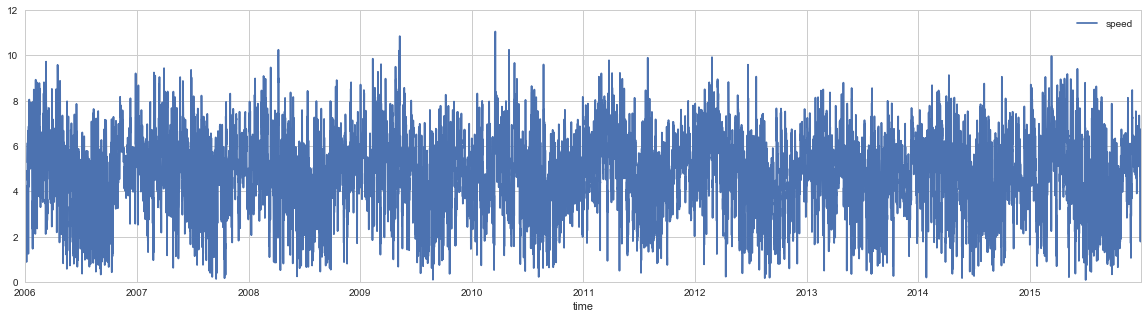

In [34]:
df.plot(y='speed',legend=True,figsize=(20,5))

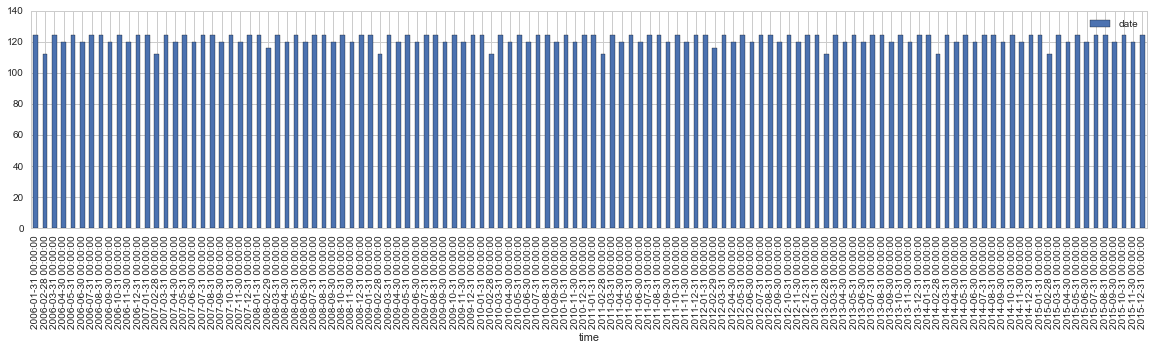

In [35]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


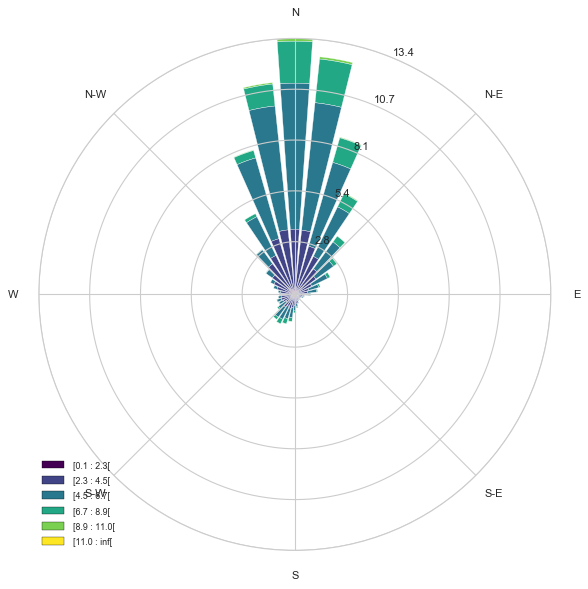

In [36]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [37]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [38]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl8TPf+x/FXZpKRZbKJWFtENJaikVgrxFK11RISCRK0
rrW3amkvem9D1XrRKrW0uiCEELcILkXTpnYZomgtVZSqJCYJmWyTZOb3R675SckIZuZkMt/n45FH
M3PO95z3NPHJ2b7fr51er9cjCIJgZjKpAwiCYBtEsREEwSJEsREEwSJEsREEwSJEsREEwSJEsREE
wSLszbVhnU7HrFmzuHjxIgqFgjlz5lCvXj3D8l27drFu3Trkcjl+fn7MmjULmUxGSEgISqUSgOee
e4758+ebK6IgCBZktmJz4MABtFotcXFxpKSksGDBAlatWgVAfn4+S5cuJSEhAScnJ6ZMmUJiYiJB
QUHo9XpiYmLMFUsQBImY7TRKpVLRsWNHAPz9/Tl37pxhmUKhYPPmzTg5OQFQVFRElSpVuHDhAnl5
ebzxxhsMHz6clJQUc8UTBMHCzHZko9FoDKdDAHK5nKKiIuzt7ZHJZFSrVg2AmJgYcnNz6dChA5cu
XWLUqFGEhYVx7do1Ro8ezd69e7G3LzumSqUy10cQBOExAgMDy72u2YqNUqkkJyfH8Fqn05UqGjqd
jkWLFnH16lWWL1+OnZ0dPj4+1KtXz/C9h4cH6enp1KpVy+i+nuQDW4JKpbLKTGq1mvjvLuHq5lnm
Otn3Mgnt6oeXl5dFMkmhIuaqqJmehNmKTUBAAImJifTu3ZuUlBT8/PxKLY+OjkahULBy5UpkspKz
ufj4eC5dusSsWbNITU1Fo9Hg7e1trojCU9DpdGRkZDx2PU9PT8PPVRDAjMWme/fuHD58mIiICPR6
PfPmzSMhIYHc3FyaNWtGfHw8rVq1YsSIEQAMHz6c0NBQZsyYwZAhQ7Czs2PevHlGT6EEy8vNyWbr
/jt4eVcvc50czT1G9GtlkqMfofIw279kmUzG7NmzS73n6+tr+P7ChQuPbLdkyRJzRRJMxFnpavRU
SxAeRRznCoJgEaLYCIJgEaLYCA9Rp99m97avuXhORVFRodRxhEpCXH21ATqdjqysLNRqtdH1MjIy
yMvLZcnM8dy8dhkAR2cXmjZvw4st29M84GXsxB0m4SmJYmMDMjMz2X/yFr9mOBtdL/XPG3yzcRU3
r12mfXBvXFzdOXf6CKeOJ3LqeCIA7p7VaPRiIK06vEIz/3a4e1azxEcQKgHxZ8pGOLkocXXzNPp1
4tC3pJz4nkYvBjLunfm8/vdolny5l6XrDjB60oe0C+5FYaGWE4f2sXLhu0wY0pEZ4wewO/4rxFDW
pjNixAh++uknALRaLYGBgSQkJBiWR0VF8csvvzzULikpibi4OG7evMngwYPLvb8OHToYtnvlypVn
TF82cWQjAHD21GH2xH+Nu4cXE//5MfYOCsMy7xp16NwzlM49Q/njxm/cvvU7t65f5tzpo1w8pyL2
i0XUet6HgLZdJPwE5vHuu++ydetWk24zLCyMRYsWlbm8Q4cOJCcn06JFC1QqFUFBQZw5cwaAgoIC
/vjjDxo3bvxQu06dOgFw8+ZNk+Y1FXFkI5B2+yafzp+KTC5j5Fuz8Kha9lPbMpmM5+v70XfwaGbM
/4o5y+Oxk8nY/OUSiouLLJi68nr55ZdJTk4G4IcffiAsLIycnByys7M5ffo0bdq04eTJkwwZMoTI
yEhmzJhBYWEh//nPf1i8eDFQcv1t3LhxhIWFsWLFCgCmT59OUlISUHIUNH36dIt+LnFkY+MK8vNY
+uFENNl3CR0+kfoNmz5R++fqv0Bw9xC+37eNH/dvp3PPUDMllcaiRYuMHoWYQ9OmTfntt9/Q6/Wc
PHmSKVOm0KxZM44cOcLFixcJCgri/fffJzY2Fi8vL5YuXco333xT6mn73NxcFi1ahLOzM8OGDaNb
t24W/QyPIo5sbJher+fLT2Zy/covdO01mHbBvZ5qO4Oi3kJRxZH4mOXk5+eaOKXtkclkNG7cmKSk
JLy9vVEoFPj7+3Pq1ClUKhXt27cnLS2NSZMmERUVxeHDh/njjz9KbaNx48a4uroil8tp3rw5V69e
LbVcimtsotjYsL3b13M4MYGGjV9i+Ph/PvV2qlarQa+QEWSq09j7zXoTJrRdHTp04LPPPjOMCdWo
USN+/vlndDodnp6e1KxZk5UrVxITE8O4ceNo165dqfZXrlwhJyeHoqIifvrpJ1544QUUCgXp6ekA
/Pzzzxb/TKLY2KjzZ44Tu2YRHp7VmPT+MhwUisc3MuK1sFG4unuSsPULsu9lmiil7Xr55ZdRqVQE
BwcDYG9vj6urK23atEEmk/HPf/6TMWPGEBERQWxs7EOjKri7uzN58mQiIiLo0aMHDRs2JCwsjLVr
1zJy5EhSU1Mt/pnENRsbdCftFsvnTcbOzo6J//oET6+ye3CXl7OLKyFDJ7B+1Vz2xH/N6wPamiCp
7apTpw4XL14s9d7KlSsN3wcFBREUFFRq+cCBAw3f79y586FtNm/evNQt9PsOHz4MYPbheMWRjY3R
FuSz9MOJZN/NJGrcDBq9GGCybXfrPZgateryw/5v+O2330y2XaFyEMXGhuj1er5a/gFXL58n+NWB
vPLaEJNu395BQfjrk9EVFzN37lyTbluwfqLY2JD9CbH8eGA7DV5oxsi/R2NnZ2fyfbTp2IP6DZuy
Y8cOjh8/bvLtC9ZLFBsb8eeN39jw2QLc3KsyKXoZCkUVs+zHzs6OgZFvAiVP34puDMJ94gKxjTj8
3Q6Ki4sYM2UuXt7GB5B/Vn5NW9KjRw/27dvHrl276Nu3r1n3Z046nY7MTNPeXbPV8ZlFsbEBf/75
Jz+fPsJz9Rri3ybYIvuMjo5m//79TJs2jV69elntWNKZmZms25mMi9LNJNuz5fGZrfM3QHgia9eu
Racrpkf/KLNcp3mURo0aMWrUKNasWcPXX3/N6NGjLbJfc3BRull8zOXjx48zadIkGjZsiF6vJysr
iwkTJtC7d+9Hrn/r1i0uXLhA165dLZrzSdjesZyNKSgoYN26dTg6K3m562sW3fesWbNwcnIiOjq6
1BxiQvm0a9eOmJgYNmzYwIwZM/jiiy8eObQEwLFjxzh16pSFEz4ZcWRTycXFxXHnzh1e7jYAR0fj
g2eZyv25papWrcqECRNYsmQJc+bM4Z133nloPaF8HB0dCQ8PZ8+ePWzYsIHbt2+TlpZG165dmThx
Ip9//jn5+fm0bNkSV1dXPv30U/R6PTk5OSxZsgQfHx+pP4IoNpWZXq9n2bJlyGQyWgf1tNh+H5xb
6rnmPXF1+5KPly6jqm8Qbu5VgZJrFy/VFb9+T8LLy4tvv/2Wnj17EhYWRkFBAZ06dWLy5MmMGTOG
3377jW7durFx40YWLVpEjRo1WL16NXv37mX8+PFSxxfFpjI7evQoKpWKPn36mKRLwpO4P7eUq5sn
AyP/zrqVc9i/M5aRb77/wFqih/iTuHXrFi1btuTs2bMcO3YMpVKJVqt9aL0aNWowd+5cnJ2dSU1N
JSDAdE+JPwtRbCqxZcuWATB69GhSfpfulKVr78Hs2xHDd3u20KN/JLWek/6Q/knkaO5Jvq3c3Fy2
bt1KaGgoeXl5zJ49m+vXr7Nlyxb0ej0ymcxwWvr++++zf/9+lEol06ZNqzDPOpmt2Oh0OmbNmsXF
ixdRKBTMmTOHevXqGZbv2rWLdevWIZfL8fPzY9asWQBG2wjld/PmTeLj42nevDkdOnQg5fcfJcti
b+/A4JGTWTZ3ElvXLWPiPz+WLMuT8vT0ZES/VibfZnkcO3aMqKgoZDIZWVlZvPXWW/j4+DB16lRS
UlJQKBTUq1e

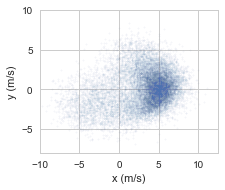

In [39]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [40]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [41]:
# %%time
# original_incre, incre = SECTOR_LENGTH, rebinned_angle
# start, end = -original_incre/2 + incre/2, 360

# max_speed = df.speed.max()
# max_count = max_count_for_angles(df, start, end, incre)
# plot_range = [0, max_speed, 0, max_count*1.05]

# for angle in arange(start, end, incre):
#     start_angle, end_angle = angle-incre/2, angle+incre/2
#     sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
#     fig = plt.figure()
#     sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
#     plt.axis(plot_range)
#     plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
# align_figures()

## 2.3 Overview by Month

In [42]:
# %%time
# current_df = df.query('speed>=1')
# for month in arange(1, 13): 
#     sub_df = current_df[current_df.index.month == month]
#     ax = WindroseAxes.from_ax()
#     ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
#     plt_configure(figsize=(3,3), title='Month: %s'%(month))
# align_figures()

In [43]:
df.describe()

lat      lon             x             y         speed  \
count  14608.0  14608.0  14608.000000  14608.000000  14608.000000   
mean      18.0     32.0      3.168748      0.067243      4.732075   
std        0.0      0.0      3.180718      2.199627      1.614755   
min       18.0     32.0     -9.673088     -6.893333      0.082299   
25%       18.0     32.0      1.889929     -1.476941      3.693130   
50%       18.0     32.0      3.988502     -0.009152      4.771020   
75%       18.0     32.0      5.301138      1.486068      5.823084   
max       18.0     32.0     11.048299      8.297254     11.049359   

                dir          date          HrMn  dir_windrose  
count  14608.000000  1.460800e+04  14608.000000  14608.000000  
mean     173.117035  2.010567e+07    900.000000    173.117035  
std      145.691506  2.872210e+04    670.843355    145.691506  
min        0.001494  2.006010e+07      0.000000      0.001494  
25%       21.043529  2.008070e+07    450.000000     21.043529  
50%      181.420702  2.010567e+07    900.000000    181.420702  
75%      335.805964  2.013070e+07   1350.000000    335.805964  
max      359.986452  2.015123e+07   1800.000000    359.986452

# 3. Create input data and configuration

In [44]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
# FIT_METHOD = 'chi_square'
# FIT_METHOD = 'k_s'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [45]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

[-8.  -7.5 -7.  -6.5 -6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.
 -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8. ]


# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

0.5
Wall time: 29.7 s


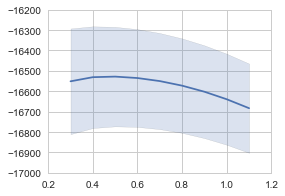

In [47]:
%%time
if 'bandwidth' not in globals():
    from sklearn.model_selection import GridSearchCV  

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.3,1.2,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=40000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel=KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4, return_train_score=False) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    plt.plot(bandwidth_range, grid.cv_results_['mean_test_score'], label='test')
    plt.fill_between(bandwidth_range,
                     grid.cv_results_['mean_test_score']+grid.cv_results_['std_test_score'], 
                     grid.cv_results_['mean_test_score']-grid.cv_results_['std_test_score'], alpha=0.2)
    plt_configure(figsize=(4,3))
    
print(bandwidth)

In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH
         }

In [49]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.5 1089
[  3.40279999e-14   5.88528400e-12   7.34809741e-10   4.39492005e-08
   1.11647021e-06]


In [50]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUJHd9J/iJvKuy7vs+1QKrRQNCVsPzSNjCbYleGHMJ
I2QvK/XMaBmvvXpeoOVeJDU0RubhET5WyDYevzeLsIXWg/3A7CwLbWGtRb82skfI6gaeVVlXVlUe
lZmVlXdmHPtH6Rv9y8i4M7IqsxWf9/TU3Rn5i19kRnzye36+nCRJEly4cOHiOoXnqDfgwoULF62E
S3IuXLi4ruGSnAsXLq5ruCTnwoWL6xouyblw4eK6hktyLly4uK7hkpwLFy6ua7gk58KFi+saLsm5
cOHiuoZLci5cuLiu4ZKcCxcurmu4JOfChYvrGi7JuXDh4rqGS3IuXLi4ruGSnAsXLq5ruCTnwoWL
6xouyblw4eK6hktyLly4uK7hkpwLFy6ua7gk58KFi+saLsm5cOHiuoZLci5cuLiu4ZKcCxcurmu4
JOfChYvrGi7JuXDh4rqG76g34OLoIUkSqtUqeJ6H1+uF3++Hx+MBx3FHvTUXLpoGJ0mSdNSbcHF0
qFQqyGaz6O3tRa1WAwBsb29jcHAQvb298Hg8Lum56Gi4ltzrGIIgoFQqIZlMIhwOg+d5+P1+SJIE
SZIgCAJ4nke1WgXHcfB6vS7pueg4uCT3OoQkSeB5HoIggOM4CIKAlZUVCIIAn88HURRRLBYRDAbh
8127RYj0KpUKPB4PvF4vvF4vfD6fS3ou2hauu/o6gyiKqNVqoK99Z2cH6XQac3NzCAQCqFariMVi
4DgOtVoNPp8P3d3d6OrqQnd3N7xeb916tA7HcTLZ+Xy+huNcuDgquJbc6wTkfgqCAADgeR7RaBSi
KMLv96O3txfVahWhUAh+vx/9/f0Ih8OoVCooFovIZrOIx+My6RHxsWTG8zwkSUKlUkEikcD4+DgC
gYBLei6OFC7JvQ4giiJ4nocoiuA4DrlcDltbWxgaGkJfXx82Njbqjuc4DpIkgeM4hEIhhEIhDA0N
QZIklMtllEol7O3tIRaLwe/3y4THkl6hUEC1WpVJj9xb19JzcdhwSe46B8XRKJkQi8Wwv7+P2dlZ
2VIzG7HgOE4mM5b0isUi9vb2sLOzg0AggO7ubkiSJJMqcC0O6JKei8OGS3LXKURRhCAIEEURAFCt
VrG5uYlAIIDl5WU5odBMsoAlPTonWXqiKGJzcxPBYFCO53V1dcHjOag/d0nPxWHBJbnrEKIoYnd3
F9lsFnNzc8hkMojFYhgbG8PQ0FADsSktOXJXrcLj8cjxuv39fUxOTsqZ2nQ6jXK5jGAwWOfe6pFe
Pp9HX18fgsGgS3oubMMluesM5J4CB8QRjUZRKpWwuLiIUCjUcHwryz48Hg9CoRC6u7sBHJBvqVRC
qVRCKpVCpVJBKBSSLb1QKFRHeolEAj6fDzzPu5aeC9twSe46gbL2rVarIZ/PY2BgAMvLyzJ5aL0X
aC3hAQekFw6HEQ6HAVwjvWKxiN3dXZn0yNKj5AdZllrubSAQcGv0XGjCJbnrAMrat93dXSQSCQQC
AUxPT+u+V40c7LqrVqEkPerAoC4MnucRi8UQDodlS88okUG9ty7puSC4JNfhIOsNOCCJra0t8DyP
iYkJ7O/vm1qjXerBvV4venp60NPTAwCIRCLo6+tDtVpFIpFArVars/TUSK9Wq6FcLsukx3Ec/H6/
696+juGSXIdC6Z7m83lEo1EMDAxgbm4OhULBFHlpWTxOEF+za3Ach+7ubgwMDAC4ZukVi0XE43Hw
PC+TXnd3N4LBYAPp7ezsyGu4lt7rEy7JdSDY2jcAiMfjyGQymJ6eRm9vr3ycXZJxggBaQSJKS4/n
eZn0YrEYeJ6vK1cJBoPyXrQsPZf0rn+4JNdBkCQJqVQKfr8foVAItVoN0WgUHMdheXkZfr9fPtbs
Q3tY8bdWwOfzobe3VyZ2lvT29vYgCIKccAkGg3UJCpb0KKZHxOeS3vUFl+Q6BNSalclk5DjV1tYW
RkZGMDIy0vBQNktenUh8aqS3vb0t/18QhDqxAZb0RFGUEzgs6fl8Pvh8Ppf0OhguyXUABEGQBS0B
IJPJoFqtYn5+Xq5Bswsiw0KhgGw2K3cvXA8ggiLiq9VqdZaeKIoy4XV3d9dZcCzp1Wo15HI5jI+P
u6TXgXBJro2hTC6Uy2Xk83kEg0HccMMNuhlDs5YcHRONRtHX14e9vT0Ui0X4fD4IgtDQmdDJ8Pv9
8Pv96OvrAwDUajUUi0WUSiWk02lIklRn6RHp8TyPYrEou7ccx7mWXgfBJbk2BascAgDpdBrxeByh
UAj9/f2GJRFmSK5Wq2FzcxMAsLS0JP97IpGQz8t2JpDFw5ZudDJIUqq/vx+SJNVZeul0GgDQ1dUl
C4lScTJQb+m5pNfecEmuDcHWvomiiO3tbZTLZSwuLsoPX7Ng5ZaKxSL8fr/sEnMch0AggKGhIXkP
9PAr69WUpRtOwqkyFjN7o2sOBAJ1pFcsFpHL5VCpVLC6uqpq6QEu6bUzXJJrIyjd02KxiM3NTfT2
9sqtWWbdUK3jJElCPB7H3t4eZmZm0NPTg2QyqbumWmcCuXnK0g0K6NO5msVRkQNLen6/H+l0GuPj
4ygWiygUCtjd3YXH46krWdEiPeCg/IV+HFr1o+BCHS7JtQmUtW/JZBK7u7uYmppCf3+/rTWVJEPu
qcfjwQ033FA3v4GFEZF6vd6GLGaxWKwL6EuShHw+Lw++6eSHWpIkuUc2EAhgYGBAHuNYLBaRz+eR
SCTg9XrryJ614ERRRCKRQDgcRm9vb91QIOrMcNEauCR3xKDM5s7ODubm5iAIgixLvry8LFtFBCuW
HAtyT4eHhxtKTpotN/H5fOjr66sL6G9ubqJcLiObzcqdC6zFc1gw665aBcdxCAaDCAaDGBwcrCO9
XC4nkx573azggJqlR0OBXNJzFi7JHSEouUATsIiIBgcHMTY21lTzPB1H7mk2m5XVgFsNsk5GRkYQ
DAbl2BZr8bAPv5ZF2S4wQ5RqpFepVFAqlbC/v494PC6rJQPXEhpK97ZarQJAw1Agl/Tso73vrusY
rHtK0khbW1tynEwLVqwuURQRiUTg9Xrr1IC11lT+3wmwsS2lm0cPv95wnHaAnc+CnY9BpLexsQGf
z9cwFIidhEZkRkOHlDNvXdKzDpfkDhlqum/RaBSSJOnGyZRrGCGfz0MURfT19al2RBwV1CwedjgO
OyeCrJtm4JS72uwalHHt6+uTZ2DQdWezWcRiMQQCgbpEhhbp7ezsYHJysm4SWrt8v+0Il+QOEcqp
WdlsFtvb2xgaGpJnnBrB6GYWRVF2TzmOw+joqKm9HVUbl3I4Ds2JKBaLEEURGxsbmurBh4VWxPWs
DAViJ6FxHIdSqSR3wbiWnjFckjsksLVvkiRhe3sbhUIBCwsLcomCGei5kjSsxufzYWlpCa+++qrp
NZV/b9aCAuwRp3JOxPT0tJy9TSaTqFarddZOJxUm65Gl3lCgTCaDnZ0deSgQZa/pfYDr3urBJbkW
Q601a3NzE11dXVheXobX64UgCJbGAqodS1bh6OgohoeH5aSDlX2244OgpR7Masopa/TY6zjMgmIn
12HJfnh4uM7ClSQJa2trqkOBWNLjed4lPbgk11IoG+tTqRQSiQQmJiYwODgo/7uVQL/yWFEUEYvF
kMvlGhr2razpNJwiBSX0NOXUmu7bibyb2QtLeul0GktLS6hUKigWi4ZDgQB10qtUKujp6bnuOzJc
kmsBJEmCIAi4cuUKbrjhBgDA9vY2qtUqlpaWZDFHgtVsJh1bqVTkWapGDftm1qQbvZM05pTySsqm
e57nkUql0Nv

## 4.1 Bootstrap GOF limit

In [51]:
# %%time
# gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
#                                        for i in arange(20)) 

In [52]:
# for gof_name in [ 'R_square', 'K_S','Chi_square']:
#     plt.figure(figsize=(4,3))
#     pd.DataFrame(gof_kde)[gof_name].hist()
#     plt_configure(title=gof_name)
# align_figures()

## 4.2 Bivariate Empirical Limit

In [53]:
# fig1, ax1 = plt.subplots(figsize=(3,2.5))
# fig2, ax2 = plt.subplots(figsize=(3,2.5))
# gofs_mean_set_bivar, gofs_bivar_set=[], {}

# # for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
# for year_length, line_style in zip([5, 10], ['-.','-']):
#     # 1. Set time
#     start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#     # 2. Obtain gofs_bivar
#     df_standard = df_all_years[str(2015-year_length+1):'2015']
#     kde_result_standard, _ = fit_kde(df_standard, config)
#     gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
#                                    for start_year in arange(start_year, end_year+1)) 
#     gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
#     # 3. Make plot
#     if len(gofs_bivar)>0:
#         gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
#         gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
#     # 4. Obtain gofs averaged over late 5 years
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set_bivar.append(gofs_mean)
    
# plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
# plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
# align_figures()
# if len(gofs_mean_set_bivar)>0:
#     gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
#     display(gofs_mean_set_bivar)

## 4.3 Univariate GOF Limit

In [54]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANoAAACyCAYAAAAkutHsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXdYVNfWh9+pMPQmXUBQVFREUFGxxatiN4glEo0xmlxz
Nb2YfNeouZpiuqabmGaqMcbYokZFTdBYsKKiAoL0XhwYYMr5/kBGCSBFpHne5/F5nHP2OXudw/xm
t7XXkgiCICAiInJHkba0ASIidwOi0EREmgFRaCIizYAoNBGRZkAUmohIMyAKTUSkGWgxoZ0+fZrZ
s2dXO75v3z7Cw8OZMWMGGzZsAMBgMLB06VJmzJjB7NmzSUpKam5zRURuC3lLVPrZZ5+xZcsWVCpV
leNarZbXXnuNjRs3olKpmDlzJiNGjODEiROUl5fz008/cerUKV5//XU+/vjjljBdRKRRtEiL5uHh
wfvvv1/teHx8PB4eHlhbW6NUKgkKCuLYsWNER0czZMgQAAICAoiJiWluk0VEbosWadFCQ0NJSUmp
dlytVmNpaWn8bG5ujlqtRq1WY2FhYTwuk8nQ6XTI5bWbHx0d3bRGi4jcRFBQUIPKt4jQasPCwoLi
4mLj5+LiYiwtLasdNxgMtxRZJf98GdHR0Q1+Qa2F1ma7IAgk//ATeo0Gmz4BWPXwQ2ZiUmPZxthe
mpVF/vETKO1sUbm6YurijFShQBAESpKSyD9xioITJym6EIug0wFg6uyE/cAB2A8cgGVX33rVcyr9
PKsPf06xVsN4338xq3cYMqmsRtvjkgs4n5iLm1lBg54FWpnQfHx8SEpKoqCgADMzM44fP868efOQ
SCRERkYybtw4Tp06ha9v/V6iyJ0j+8BBkn/6GYC0LduQKpVY+XXHJjAAKz8/zDt5Ia3Hj+E/Kc/P
J+XnX8jY9YdRQABIpZg6dsBQrqU8L8942NzHB7u+gdgPGoCZpycSiaRe9QiCwLaLe/n2zCbkEhn/
6f8AwzsNvOU1u44ksfNwIssj3Bv8XK1CaFu3bqWkpIQZM2bwwgsvMG/ePARBIDw8HCcnJ0aNGkVU
VBT33XcfgiDw6quvtrTJdzXaoiKurPsKqYkJXZ5YxLVLlyk4eYqCU6cpOHUaAKlSiUVnHyy7+qI3
MUHo0weJtPYpAe21a6T++hvp23ZgKCvD1NkJ10kT0JeVo0lNozQtDU1qGgAdhg3FJjAAm4AAlDbW
jXoGAYFzWRexMbHi2cH/pot9p1uW1+kNRJ1Ow8ay5la7LiTt1Xu/pu5Ka+t+NYTWZPul994nO3I/
svBRSEcMoJdTN1QKU8pycyk8fZZrFy9y7eIlipOugsEAgIVvF7znP1StS6dTF5O2bTtpW7aiLy5B
aWdHxxnTcBw5olqLWPlVrW+rVRsGgwGpVEpJuYZSfRl2Kptay1a+9xOxWSz77DATQjrR11Pbtsdo
d5LMvfvQHv4bjasrKheXljanzVJw6jTZkfspcjTnK8UphKjTyKQyVo9djqO9A3bDBuM4YjgAeo2G
a5fjuPDDT6jPX+DM8y/SYdhQPB+YhczUtIrA5FZWeD34AM7jxiAzMUGr13Ih6xIFpYWEePQDYMX+
1SQVpDC800BGdR6Ks0WHBtsfdfUYOy5F8lzIv7FRWWOGqu6LgD9PpQIwOMCN0vzEBtd7VwgtfcdO
Ej79DIAT0SfpMGwoHaeHo3J1bbI6YuJz8HG3QWXSfl+pvqyM2A8+xCCBbYFKgjoG4GntxpX8q3Qw
twdgbfT35JbkMbHraHo7d8fGvxdKbTmdTSO4su5Lsg8cJOfvv5HIZBhKNMitrPCcMxuXsaEIJkrO
ZsZy6Go0R1NPUaLVYCI3YWDHIKQSKV0dfEgsSGHrxT1svbiH3s7dGdtlBIGuPblWpmb/lb/JKs7h
Wnkxgz36EuTqX6X1u5x7hY+OfINcJkddXoKNqn7dTq1Oz+GzaThYm9Ldy46TotCqk7F7DwmffobC
xgZhUDDKmPNkR+4n+8BBOgwdgsu4MVh09kEik9V9s1qIOp3G698co5+fE0vnDWhC61sXyT9uQJ+d
S3o/T2ZPmEWwe59q3bgyXTlnMy9yNvMiHtZuTOw6EpUgxbqHH9Ln5hL901q6HU5FotdyIsCcpF4O
LBrsh7tKxTcnN7Lt0l4A7FW2DPcagI+dFwZBQCqBGb0mMsVvDEdSTrE77gCnMy7QwcyeQNeelOnL
WX/6F6Mdh64ep5uDD/ODZuJh40ZOcR5v/PUJOkHPcwMX4G5d/17NyYvZFJfqGBXsiVTauG5ruxZa
1r5I4j/6BLmVFT1XLONCdjYBD88n9/ARkn/aQPb+A2TvP4Dc0gKb3r2x6ROATZ8ATOzt6l1HabmO
z7dULKAXqsvQ6gwo5O3PhXTDri9w2/w7Jo6OhD/7KjJT0xrLPTVoPpPzRrP14h8cTj7Bh0e/ZoLT
MPrTHwsTc466G1A/OgQblTVlJfnIinMxV5oBMNAjCJ2gZ1DHvvg6dEIqqf4eFTIFgz37MdizH1cL
UjGVV0xO2Jna8EzIIziaOyAIAhvPbSc6/SwSiYRSbSmr/vqYwtIi5vaZToBLjwY9e2W3cUiAW4Ou
u5l2LbTLaz5Ebm5Oz/8tw8zDA7KzkUilOIQMxH5gMPnHo8k9coyCk6fI+SuKnL+iADB1dsayezes
unXFsns3zDq61zpj9su+OHIKNEwa6s3Dk3s15+M1G/FZCch/3AUGAz6PPlKryCrxtvPgiYHziPC/
l+2X9lGSV7EG6mXbkS/C3kYpU9R4XRf7TlVm/8q1emRSCTJZze/ew+bGF18qlRLs3sf4+fkhj5Jx
LQtnS0dKdWU4mTvQ1d6bMV2G1/exAdDqBI6cy8DJzowuHWufNKmLdi00mZmKHi8vxbyTV7VzEqkU
u/79sOvfD0EQ0CSnkH/yFIWnT1MUe7Giexm5v6KsQoHC0hK5pQVyi4p/Fp19KO8TxKaze7B2tSBk
gDkGwcDVDDWXruYzOtizWZ/1TnL62y9wytMhGxCAbWCfui+4Tgdzex7sM83opSOVSFHWIpqa2LD3
Ehv2XMLSTIm1hRJrCxNUJnIMBgG9QcBgEDAIAqEDvBgeWH1ty9nSEQAJEnzsPJnYbVSDZyxLyvX4
d+6At5v1bc12tmuh9Vj2EhadfQBIzE/mkjqRIKpPy0okEsw8OmLm0RG3yRMRDAY0KSkUXYjlWuxF
Sq4mo1OrKcvJpTjpKhIg78hRDD/8RKiXklNdzVi+/wh+HXxJOdqVoiKBQf6uWKhq/uVuS+ReisXh
4AVKzOQMW/Rks9btYK3Cr5M9RcVlFFwrJzlTXa1MgG8H+vjeevbRRK4kzG9Mo2ywNpOz5KHbX1Zp
10K7ec2mWKthd3YUQTl98HXwrrF8uV7LX0nH8OvQGWcPD8w8PHAOHQ1Aqa6Mdw99xqnUGPzM3BmT
25msHTvpkXCNHgml5He04S+vsyh8c1je/z/tQmQGrZbz77yLTIDS6f9CeZMfKoCmTIdCLkXegFaq
PuQUaFDIpYwZ6MWYgV7G43q9gTKtHqlUgkwqQSqVIpXc/rpabZSW6ygo1tVdsB60v1H7PzAIBgRB
QCaRUazX8M2pX6htjf7HM7/xybH1PLFjOav+/IiEvIp9b0Vlav4X+R4n088R4NaTZ8Y8w9c5HfjM
815sFjyOtX8vbJMLmPhnIdM2JmB28CBlObnkFZU256M2OckbNiJNzyHW15KQ0OlVzml1Bha8vpdn
3jtIobqsSev9ducFHvzfbhLTi6ocl8mkmJkqMFXKUchlyKQSJBIJpy9ls+STKNQl5fWuIy65gITU
wluWOXYuk/d+y+D3w4mNeIqqtHuhbb6wi1V/foSrpSO+5l5cyk3gSMrJauUS8pLYfnkfHczt6Wzv
RXTaWfI0BZT

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012875  0.994768      0.985568
(1997, 2002)  0.010262  0.997762      0.988102
(1991, 1996)  0.036812  0.991603      0.979241

Wall time: 1.48 s


# 5. GMM by Expectation-maximization

In [55]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [56]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.539   4.785  -0.464  1.512  1.495   0.372
2  0.269   3.530   2.384  2.066  1.683  -0.267
3  0.192  -1.873  -1.684  2.708  1.892  -0.007

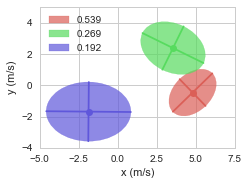

In [57]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [58]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWuQJOdZLvhk3bur7/f7dSQbjSRbY4XGGCQbm0HygPdg
bBnLhsORBtBxeCG0hOURgzTS8RgLhwn5ACsLMHjZsLzIOhxDmPXZ2DCDQIGsHRhzhKwZ21hdPd1d
3V2X7qqurvslM/dH6835KisvX2Zld1e18olQqKc768svqzKfeq/PK8iyLMOFCxcujig8h70BFy5c
uNhPuCTnwoWLIw2X5Fy4cHGk4ZKcCxcujjRcknPhwsWRhktyLly4ONJwSc6FCxdHGi7JuXDh4kjD
JTkXLlwcabgk58KFiyMNl+RcuHBxpOGSnAsXLo40XJJz4cLFkYZLci5cuDjScEnOhQsXRxouyblw
4eJIwyU5Fy5cHGm4JOfChYsjDZfkXLhwcaThkpwLFy6ONFySc+HCxZGGS3IuXLg40nBJzoULF0ca
Lsm5cOHiSMMlORcuXBxp+A57Ay4OH7Iso1KpoFarwev1wu/3w+PxQBCEw96aCxdNQ5BlWT7sTbg4
PJTLZWQyGXR3d6NarQIANjY20N/fj+7ubng8Hpf0XLQ1XEvuTQxRFFEsFpFMJhEOh1Gr1eD3+yHL
MmRZhiiKqNVqqFQqEAQBXq/XJT0XbQeX5N6EkGUZtVoNoihCEASIooilpSWIogifzwdJklAoFBAM
BuHzXb9FiPTK5TI8Hg+8Xi+8Xi98Pp9Lei5aFq67+iaDJEmoVqugj31zcxOpVAozMzMIBAKoVCqI
xWIQBAHVahU+nw+dnZ3o6OhAZ2cnvF5v3Xq0jiAICtn5fL6G41y4OCy4ltybBOR+iqIIAKjVaohG
o5AkCX6/H93d3ahUKgiFQvD7/ejt7UU4HEa5XEahUEAmk0E8HldIj4iPJbNarQZZllEul5FIJDA6
OopAIOCSnotDhUtybwJIkoRarQZJkiAIArLZLNbX1zEwMICenh6srq7WHS8IAmRZhiAICIVCCIVC
GBgYgCzLKJVKKBaL2NnZQSwWg9/vVwiPJb18Po9KpaKQHrm3rqXn4qDhktwRB8XRKJkQi8Wwu7uL
6elpxVLjjVgIgqCQGUt6hUIBOzs72NzcRCAQQGdnJ2RZVkgVuB4HdEnPxUHDJbkjCkmSIIoiJEkC
AFQqFaytrSEQCGBxcVFJKDSTLGBJj85Jlp4kSVhbW0MwGFTieR0dHfB49urPXdJzcVBwSe4IQpIk
bG1tIZPJYGZmBul0GrFYDCMjIxgYGGggNrUlR+6qVXg8HiVet7u7i/HxcSVTm0qlUCqVEAwG69xb
I9LL5XLo6elBMBh0Sc+Fbbgkd8RA7imwRxzRaBTFYhHz8/MIhUINx+9n2YfH40EoFEJnZyeAPfIt
FosoFovY3t5GuVxGKBRSLL1QKFRHeolEAj6fD7VazbX0XNiGS3JHBOrat2q1ilwuh76+PiwuLirk
ofdaYH8JD9gjvXA4jHA4DOA66RUKBWxtbSmkR5YeJT/IstRzbwOBgFuj50IXLskdAahr37a2tpBI
JBAIBDA5OWn4Wi1ysOuuWoWa9KgDg7owarUaYrEYwuGwYumZJTKo99YlPRcEl+TaHGS9AXsksb6+
jlqthrGxMezu7nKt0Sr14F6vF11dXejq6gIARCIR9PT0oFKpIJFIoFqt1ll6WqRXrVZRKpUU0hME
AX6/33Vv38RwSa5NoXZPc7kcotEo+vr6MDMzg3w+z0VeehaPE8TX7BqCIKCzsxN9fX0Arlt6hUIB
8XgctVpNIb3Ozk4Eg8EG0tvc3FTWcC29NydckmtDsLVvABCPx5FOpzE5OYnu7m7lOLsk4wQB7AeJ
qC29Wq2mkF4sFkOtVqsrVwkGg8pe9Cw9l/SOPlySayPIsozt7W34/X6EQiFUq1VEo1EIgoDFxUX4
/X7lWN6H9qDib/sBn8+H7u5uhdhZ0tvZ2YEoikrCJRgM1iUoWNKjmB4Rn0t6RwsuybUJqDUrnU4r
car19XUMDQ1haGio4aFslrzakfi0SG9jY0P5vyiKdWIDLOlJkqQkcFjS8/l88Pl8Lum1MVySawOI
oqgIWgJAOp1GpVLB7OysUoNmF0SG+XwemUxG6V44CiCCIuKrVqt1lp4kSQrhdXZ21llwLOlVq1Vk
s1mMjo66pNeGcEmuhaFOLpRKJeRyOQSDQRw7dswwY8hrydEx0WgUPT092NnZQaFQgM/ngyiKDZ0J
7Qy/3w+/34+enh4AQLVaRaFQQLFYRCqVgizLdZYekV6tVkOhUFDcW0EQXEuvjeCSXIuCVQ4BgFQq
hXg8jlAohN7eXtOSCB6Sq1arWFtbAwAsLCwov08kEsp52c4EsnjY0o12BklK9fb2QpblOksvlUoB
ADo6OhQhUSpOBuotPZf0WhsuybUg2No3SZKwsbGBUqmE+fl55eFrFqzcUqFQgN/vV1xiQRAQCAQw
MDCg7IEefnW9mrp0w0k4VcbCsze65kAgUEd6hUIB2WwW5XIZy8vLmpYe4JJeK8MluRaC2j0tFApY
W1tDd3e30prF64bqHSfLMuLxOHZ2djA1NYWuri4kk0nDNbU6E8jNU5duUECfztUsDoscWNLz+/1I
pVIYHR1FoVBAPp/H1tYWPB5PXcmKHukBe+Uv9OWwX18KLrThklyLQF37lkwmsbW1hYmJCfT29tpa
U00y5J56PB4cO3asbn4DCzMi9Xq9DVnMQqFQF9CXZRm5XE4ZfNPOD7Usy0qPbCAQQF9fnzLGsVAo
IJfLIZFIwOv11pE9a8FJkoREIoFwOIzu7u66oUDUmeFif+CS3CGDMpubm5uYmZmBKIqKLPni4qJi
FRGsWHIsyD0dHBxsKDlpttzE5/Ohp6enLqC/traGUqmETCajdC6wFs9BgdddtQpBEBAMBhEMBtHf
319HetlsViE99rpZwQEtS4+GArmk5yxckjtEUHKBJmAREfX392NkZKSp5nk6jtzTTCajqAHvN8g6
GRoaQjAYVGJbrMXDPvx6FmWrgIcotUivXC6jWCxid3cX8XhcUUsGric01O5tpVIBgIahQC7p2Udr
311HGKx7StJI6+vrSpxMD1asLkmSEIlE4PV669SA9dZU/98JsLEttZtHD7/RcJxWgJ33gp2PQaS3
uroKn8/XMBSInYRGZEZDh9Qzb13Ssw6X5A4YWrpv0WgUsiwbxsnUa5ghl8tBkiT09PRodkQcFrQs
HnY4DjsngqybZuCUu9rsGpRx7enpUWZg0HVnMhnEYjEEAoG6RIYe6W1ubmJ8fLxuElqrfL6tCJfk
DhDqqVmZTAYbGxsYGBhQZpyawexmliRJcU8FQcDw8DDX3g6rjUs9HIfmRBQKBUiShNXVVV314IPC
fsT1rAwFYiehCYKAYrGodMG4lp45XJI7ILC1b7IsY2NjA/l8HnNzc0qJAg+MXEkaVuPz+bCwsIDX
X3+de031v5u1oAB7xKmeEzE5Oalkb5PJJCqVSp21006FyUZkaTQUKJ1OY3NzUxkKRNlreh3gurdG
cElun6HVmrW2toaOjg4sLi7C6/VCFEVLYwG1jiWrcHh4GIODg0rSwco+W/FB0FMPZjXl1DV67HUc
ZEGxk+uwZD84OFhn4cqyjGvXrmkOBWJJr1aruaQHl+T2FerG+u3tbSQSCYyNjaG/v1/5vZVAv/pY
SZIQi8WQzWYbGvatrOk0nCIFNYw05bSa7luJvJvZC0t6qVQKCwsLKJfLKBQKpkOBAG3SK5fL6Orq
OvIdGS7J7QNkWYYoirhy5QqOHTsGANjY2EClUsHCwoIi5kiwms2kY8vlsjJL1axhn2dNutHbSWNO
La+kbrqv1Wr

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHepJREFUeJztnXtQVOf5x7/LLgsoq8SIK6KCojHiEG9o4piikqrRMVHG
EECk09HR1sZEo7HERNGfQdHY6LQlamInNSJUouk02nRorJdQk8aIDoaIeAFdQRjAC7pcFFjO74/1
HM/unsvuspez8HxmmMg5572s2Y/Pe97znudVMQzDgCAIxeHn7Q4QBCEMyUkQCoXkJAiFQnIShEIh
OQlCoZCcBKFQNN7ugBznzp3zdhcIhTN+/HjJ88XFx2EyhQie02q1iImJcUe3Oo3i5QSA/P876db6
jUYjdDqdW9twFb7SV0/1M2nDNNlrTKYQDBq8RfBc5c33XN0ll0HDWoJQKCQnQSgUkpMgFArJSRAK
heQkCIVCchKEQiE5CUKhkJwEIUFHRwcyMjKQlJSEtLQ0GAwGi/MnTpzA/PnzkZSUhC+++MLi3J07
dzBlyhSUl5cDAAwGA1JSUrBgwQJs2LABHR0dkm2TnAQhwX/+8x+0trYiPz8fq1evxtatW7lzbW1t
yMrKwmeffYacnBzk5+fj9u3b3LmMjAwEBgZy12dlZWHlypXIy8sDwzA4fvy4ZNskJ0FIcO7cOfzi
F78AAIwZMwY///wzd668vByDBw9G7969odVqMX78eJw9exYAsG3bNiQnJ6Nfv37c9RcvXsTEiRMB
AHFxcfj+++8l2yY5iW7BvdYrgj9yNDY2Ijg4mPtdrVajvb2dO8dfotizZ080Njbi73//O/r06cNJ
zcIwDFQqFXet0WiUbNsn1tYSRGepxIuCx5+SKRccHIympibu946ODmg0GsFzTU1N0Ol0yMnJgUql
wv/+9z9cunQJ6enp2L17N/z8/Cyu7dWrl2TbFDkJQoJx48ahsLAQAFBcXIxnnnmGOxcVFQWDwYCG
hga0traiqKgIY8eORW5uLg4cOICcnByMHDkS27ZtQ2hoKKKjo3HmzBkAQGFhIWJjYyXbpshJEBJM
nz4d3333HZKTk8EwDLZs2YKjR4+iubkZSUlJePfdd7F48WIwDIP58+dDr9eL1pWeno7169djx44d
GDp0KGbOnCnZNslJEBL4+flh06ZNFseioqK4P8fHxyM+Pl60fE5ODvfnIUOG4MCBA/a37UA/CYLw
ICQnQSgUkpMgFArJSRAKheQkCIXildnahIQEbtXFwIEDkZWV5Y1uEISi8bicjx49AsMwFlPMBEHY
4nE5y8rK0NLSgkWLFqG9vR2rVq3CmDFjPN0NoptR1WwQPC63fM+beFzOwMBALF68GImJibhx4waW
LFmCgoICbr2iEHILhF2BJ9pwFe7qa41ReKvWMJ3KqfqU9Hd6j5ns7S44jMflHDJkCCIiIqBSqTBk
yBCEhISgvr4eYWFhomXcnZzYVxI1A67ta3ltk8Xvz4wZZHtNSSXqmm3LRul7StbtS3+nSsXjch4+
fBhXrlzBxo0bUVtbi8bGRoSGhnq6G90WvpBRMbYyWiN0TXlJJVePnKSE83hcztdeew1r165FSkoK
VCoVtmzZIjmkJVwHJ5QdUkrBlidJ3YvHrdBqtfjoo4883Wy3x1Vi8iFJ3QuFrG6AO8TkIySpycSA
bjk7B8nZTXCXmGJtXCm+YXl/SxHVYUjOLo71jKynCIvqC53uSe6d8pJKACSpI5CcXRh3D2cdgT/0
BUhSe6CF710cJYjJh5O0tslrUd0RnEkqbTKZsHbtWiQnJyMlJQVXrpiz/F26dAkLFixAWloaFi9e
zOW4FYPk7KKU1za5TczSu/c7VT4qZpDPSOpMUumTJ807sR88eBArV67Ezp07AQCbN2/G+vXrkZOT
g+nTp2Pv3r2SbdOwtgvS2S+7nHxRz4ahtKxG8hqTyYQYmdla61ledw51rxqrBY/HyZSzN6k0AC6p
9KxZszB16lQAQHV1NZcCc8eOHVySaZPJhICAAMm2Sc4uiqNR01rIqGfFl1Pac/7KxSqLOqP79Bav
K2aQ2wVVI8apcmJJpTUajWhSaQDQaDRIT0/HsWPH8Kc//QkAODHPnz+PAwcOIDc3V7JtkrOL4WjU
ZAWSk81Rwgb35r645WU1XDtikvKjqJImi5xJKs2ybds2vPPOO3j99dfx9ddfo0ePHvjXv/6F3bt3
49NPP0WfPn0k26Z7zi6Eo7Oz7hLTmqhnw7g2Su/elxw2R8UMUtQ9qDNJpf/xj3/gk08+AQAEBQVB
pVLBz88PX331FZdsetAg+f9HFDm7CEoVkw/bFhtJpaKoUiKoM0mlZ8yYgbVr1yI1NRXt7e147733
4O/vj82bNyMsLAxvvvkmAGDChAl46623RNsmObsA3hazpOEOYkKetvv6qGfDfEZQZ5JK9+jRA3/8
4x9t6vrxxx8dapvk9HGcXWjgjJglDXfsPtduMkHT0CoqLTfMfTzrKyapu2dxlQzJ6cM4I6ajzyit
pRs2tJ/IlZawL1uXVNRxx4RElYqinpjFVTIkp4/SmaV59kRNvpT2CikEvywrqrWkJKgwNFvrgzgr
pj1Rs6ThDifmsKH9OiWmNWx9/DZY+LO51ihtCaKnoMjpozj7hZWKmnwp5Sgx1kuebze1YyyElwgN
G9oP1yrqbCaS7Img3Sl6kpw+Ro2REUzE5SqkxOQLOWKQdN6nizdqbASO0T0pIyeoGN1peEvDWgKA
zEyssZ4TbcSgUFkxAWDw08Hctez1/HqAJ/8QCA1xpYa3Slqk4E4ocnYTpO43pYazfCnFuPCw1uaY
yc+EcbxhLVv+cuUTQWN0oU8EraizmShy5QRR6T3bPgJQdFZpktOHKK9tQlhUX6fLS91vWospJaW1
jCPDbKX+uarG4rrRgXqL+lhJ2aHusKH9LAS15/7TEfSqKPmLFAYNa32MmnLpF3RdiZSYI8P6cT9C
RPQOtrjmwsNaC1n5Q10+/CGu3AxuVx/ekpw+RGcnQoQmWkoa7ohGTT6sXEJClrbdsvm57n/X4hoh
Sa0FFboH9eTaX6UhOay9e/cucnNzceLECRgMBvj5+WHw4MF46aWXkJKSIvvKC6Ecovv0dmh1ED9q
8qMln9K2W0/qt8rabzQaUfrwlsWxaP9wjAzrh0s1dbjwsBajA/UYMSjUYogrNosrNrztyohGztzc
XLz99tvo06cPtm7disLCQpw+fRoffvghQkJCsHz5cuzfv9+TfSUe4+j9liNYR00hMdnoGB0ayv0I
YX2eLcePooB8BJUa3nZlRCOnXq/H559/bnN82LBhGDZsGFJTU/Hvf//brZ0jbAnTqVDX/PilZDdF
Dut7TWsxrWWsZcpt6jAFmtDMmJfr6VVRTwStrzfX8TiKXqiRjqAscs8/uyKikfOXv/wl9+fW1lYA
gMFgwKlTp9DR0QEAmDlzppu7RwjB3nu6M4IKwR/GsrBiRj+lt/iJDOyF6Kf03DXcdbwoCkAwgvKR
ev7a1ZGdEMrOzsa6detQXV2N1NRU7Nu3DxkZGZ7oGyGBJwRlJ4D4sHJZCPdYQiH4wrJlrAVl22Kx
Ht6yiC1O6KrIynnixAlkZmbin//8J1599VXs27cPpaWlnugbIYMnl7Hxh7PW0RIATCix+Anocc3i
d/Z6tjxfUPYfgAsPawUfsXgzejqTt7atrQ1r1qzBggUL8Nprr+H48eMWZY4ePYqkpCTZtmXl7Ojo
gFarxcmTJzFlyhR0dHSgpaXFkc9HdEH40ZKVb7huAPczUB3C/Zm9xoQSWUEBy+GtK9+KcQZn8tYe
OXIEISEhyMvLw1/+8hd88MEHXJnS0lIcPnwYDCO8izgfWTknTZqEOXPmoK2tDRMmTMDChQtt0jIQ
3iNK39Pt957

In [59]:
PLOT_AXIS_RANGE

array([-8. , -7.5, -7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. ,
       -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,
        3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ])

## Goodness-of-fit Statistics

In [60]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.982  0.019      0.112     1096.980  8.147460e-07      0.022       0.249

In [61]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [62]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [63]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.274157640325503
     jac: array([ -1.09824073e+00,  -3.57627869e-07,   0.00000000e+00,
         1.07288361e-06,   1.19209290e-07,  -1.43051147e-06,
        -1.09824085e+00,   3.57627869e-07,   0.00000000e+00,
        -1.19209290e-07,   3.57627869e-07,   3.57627869e-07,
        -1.09824347e+00,   1.19209290e-07,  -2.38418579e-07,
         0.00000000e+00,   1.19209290e-07,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 689
     nit: 33
    njev: 33
  status: 0
 success: True
       x: array([ 0.39617034,  4.81805667, -0.55230394,  1.47428938,  1.6158387 ,
        0.42303129,  0.34773321,  4.28256631,  1.55210563,  1.92421437,
        1.93444841, -0.39147323,  0.25609645, -0.96955793, -1.52235067,
        3.48351529,  2.24190056,  0.11928861])

## 6.1 GMM Result

In [64]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.396   4.818  -0.552  1.474  1.616   0.423
2  0.348   4.283   1.552  1.924  1.934  -0.391
3  0.256  -0.970  -1.522  3.484  2.242   0.119

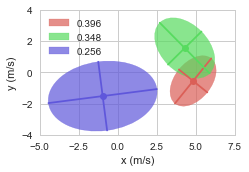

In [65]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [66]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.995  0.012      0.111      516.226  2.325507e-07      0.012       0.133

In [67]:
# Empirical Power
# gofs_mean_set_bivar

In [68]:
# %%time
# if df_all_years.index.year[0] <= 2000:
#     # GMM test against previous data
#     fig1, ax1 = plt.subplots(figsize=(3,2.5))
#     fig2, ax2 = plt.subplots(figsize=(3,2.5))
#     gofs_mean_set_bivar_previous = []
#     prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
#     for year_length in [10]:
#         color = next(prop_cycle)
#         start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
#         gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
#            for sub_start_year in arange(start_year, end_year+1)) 
#         gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
#         gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
#         gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
#         gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
#         gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
#         year_lim = end_year-year_length-5, end_year-year_length
#         gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
#         gofs_mean['year_lim']=year_lim
#         gofs_mean_set_bivar_previous.append(gofs_mean)

#     print('10 year comparison')
#     plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
#     plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
#     align_figures()
#     display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmQHOd5Jvhk3d3VR/V93wAlARAlQQyCGpuULbkNCra8
uiiLkrVeEOtlaDX2MjySAMPiYUEWrbWDWttD0bZmPD9ErWiOLDvokGNmZIg2xzQGMuylGAAkjdjV
6O7q7jq66+i6j8zcH8038VVW3pXdXdXMJ4JBAJX15ZdVmU+95/NyoiiKcODAgYNDCtdBb8CBAwcO
9hIOyTlw4OBQwyE5Bw4cHGo4JOfAgYNDDYfkHDhwcKjhkJwDBw4ONRySc+DAwaGGQ3IOHDg41HBI
zoEDB4caDsk5cODgUMMhOQcOHBxqOCTnwIGDQw2H5Bw4cHCo4ZCcAwcODjUcknPgwMGhhkNyDhw4
ONRwSM6BAweHGg7JOXDg4FDDITkHDhwcajgk58CBg0MNh+QcOHBwqOGQnAMHDg41HJJz4MDBoYZD
cg4cODjUcEjOgQMHhxqeg96Ag4OHKIqoVCqo1Wpwu93wer1wuVzgOO6gt+bAQdPgRFEUD3oTDg4O
5XIZmUwG3d3dqFarAICNjQ309fWhu7sbLpfLIT0HbQ3HknsDg+d5FItFJBIJBINB1Go1eL1eiKII
URTB8zxqtRoqlQo4joPb7XZIz0HbwSG5NyBEUUStVgPP8+A4DjzPY2lpCTzPw+PxQBAEFAoF+P1+
eDy3bxEivXK5DJfLBbfbDbfbDY/H45Ceg5aF466+wSAIAqrVKuhr39zcRDKZxPT0NHw+HyqVCqLR
KDiOQ7VahcfjQWdnJzo6OtDZ2Qm32123Hq3DcZxEdh6Pp+E4Bw4OCo4l9wYBuZ88zwMAarUaIpEI
BEGA1+tFd3c3KpUKAoEAvF4vent7EQwGUS6XUSgUkMlkEIvFJNIj4mPJrFarQRRFlMtlxONxjIyM
wOfzOaTn4EDhkNwbAIIgoFarQRAEcByHbDaL9fV19Pf3o6enB6urq3XHcxwHURTBcRwCgQACgQD6
+/shiiJKpRKKxSLS6TSi0Si8Xq9EeCzp5fN5VCoVifTIvXUsPQf7DYfkDjkojkbJhGg0ip2dHUxN
TUmWmtGIBcdxEpmxpFcoFJBOp7G5uQmfz4fOzk6IoiiRKnA7DuiQnoP9hkNyhxSCIIDneQiCAACo
VCpYW1uDz+fDwsKClFBoJlnAkh6dkyw9QRCwtrYGv98vxfM6Ojrgcu3Wnzuk52C/4JDcIYQgCNja
2kImk8H09DRSqRSi0SiGh4fR39/fQGxyS47cVbNwuVxSvG5nZwdjY2NSpjaZTKJUKsHv99e5t1qk
l8vl0NPTA7/f75CeA8twSO6QgdxTYJc4IpEIisUi5ubmEAgEGo7fy7IPl8uFQCCAzs5OALvkWywW
USwWsb29jXK5jEAgIFl6gUCgjvTi8Tg8Hg9qtZpj6TmwDIfkDgnktW/VahW5XA6hUAgLCwsSeai9
F9hbwgN2SS8YDCIYDAK4TXqFQgFbW1sS6ZGlR8kPsizV3Fufz+fU6DlQhUNyhwDy2retrS3E43H4
fD5MTExovleJHKy6q2YhJz3qwKAujFqthmg0imAwKFl6eokM6r11SM8BwSG5NgdZb8AuSayvr6NW
q2F0dBQ7OzuG1miVenC3242uri50dXUBAMLhMHp6elCpVBCPx1GtVussPSXSq1arKJVKEulxHAev
1+u4t29gOCTXppC7p7lcDpFIBKFQCNPT08jn84bIS83isYP4ml2D4zh0dnYiFAoBuG3pFQoFxGIx
1Go1ifQ6Ozvh9/sbSG9zc1Naw7H03phwSK4Nwda+AUAsFkMqlcLExAS6u7ul46ySjB0EsBckIrf0
arWaRHrRaBS1Wq2uXMXv90t7UbP0HNI7/HBIro0giiK2t7fh9XoRCARQrVYRiUTAcRwWFhbg9Xql
Y40+tPsVf9sLeDwedHd3S8TOkl46nQbP81LCxe/31yUoWNKjmB4Rn0N6hwsOybUJqDUrlUpJcar1
9XUMDg5icHCw4aFslrzakfiUSG9jY0P6P8/zdWIDLOkJgiAlcFjS83g88Hg8Dum1MRySawPwPC8J
WgJAKpVCpVLBzMyMVINmFUSG+XwemUxG6l44DCCCIuKrVqt1lp4gCBLhdXZ21llwLOlVq1Vks1mM
jIw4pNeGcEiuhSFPLpRKJeRyOfj9fhw5ckQzY2jUkqNjIpEIenp6kE6nUSgU4PF4wPN8Q2dCO8Pr
9cLr9aKnpwcAUK1WUSgUUCwWkUwmIYpinaVHpFer1VAoFCT3luM4x9JrIzgk16JglUMAIJlMIhaL
IRAIoLe3V7ckwgjJVatVrK2tAQDm5+elf4/H49J52c4EsnjY0o12BklK9fb2QhTFOksvmUwCADo6
OiQhUSpOBuotPYf0WhsOybUg2No3QRCwsbGBUqmEubk56eFrFqzcUqFQgNfrlVxijuPg8/nQ398v
7YEefnm9mrx0w07YVcZiZG90zT6fr470CoUCstksyuUylpeXFS09wCG9VoZDci0EuXtaKBSwtraG
7u5uqTXLqBuqdpwoiojFYkin05icnERXVxcSiYTmmkqdCeTmyUs3KKBP52oWB0UOLOl5vV4kk0mM
jIygUCggn89ja2sLLperrmRFjfSA3fIX+nHYqx8FB8pwSK5FIK99SyQS2Nrawvj4OHp7ey2tKScZ
ck9dLheOHDlSN7+BhR6Rut3uhixmoVCoC+iLoohcLicNvmnnh1oURalH1ufzIRQKSWMcC4UCcrkc
4vE43G53HdmzFpwgCIjH4wgGg+ju7q4bCkSdGQ72Bg7JHTAos7m5uYnp6WnwPC/Jki8sLEhWEcGM
JceC3NOBgYGGkpNmy008Hg96enrqAvpra2solUrIZDJS5wJr8ewXjLqrZsFxHPx+P/x+P/r6+upI
L5vNSqTHXjcrOKBk6dFQIIf07IVDcgcISi7QBCwior6+PgwPDzfVPE/HkXuayWQkNeC9Blkng4OD
8Pv9UmyLtXjYh1/NomwVGCFKJdIrl8soFovY2dlBLBaT1JKB2wkNuXtbqVQAoGEokEN61tHad9ch
BuuekjTS+vq6FCdTgxmrSxAEhMNhuN3uOjVgtTXl/7cDbGxL7ubRw681HKcVYOWzYOdjEOmtrq7C
4/E0DAViJ6ERmdHQIfnMW4f0zMMhuX2Gku5bJBKBKIqacTL5GnrI5XIQBAE9PT2KHREHBSWLhx2O
w86JIOumGdjlrja7BmVce3p6pBkYdN2ZTAbRaBQ+n68ukaFGepubmxgbG6ubhNYq328rwiG5fYR8
alYmk8HGxgb6+/ulGad60LuZBUGQ3FOO4zA0NGRobwfVxiUfjkNzIgqFAgRBwOrqqqp68H5hL+J6
ZoYCsZPQOI5DsViUumAcS08fDsntE9jaN1EUsbGxgXw+j9nZWalEwQi0XEkaVuPxeDA/P4/XXnvN
8JryvzdrQQHWiFM+J2JiYkLK3iYSCVQqlTprp50Kk7XIUmsoUCqVwubmpjQUiLLX9D7AcW+14JDc
HkOpNWttbQ0dHR1YWFiA2+0Gz/OmxgIqHUtW4dDQEAYGBqSkg5l9tuKDoKYezGrKyWv02OvYz4Ji
O9dhyX5gYKDOwhVFEbdu3VIcCsSSXq1Wc0gPDsntKeSN9dvb24jH4xgdHUVfX5/072YC/fJjBUFA
NBpFNpttaNg3s6bdsIsU5NDSlFNqum8l8m5mLyzpJZNJzM/Po1wuo1Ao6A4FApRJr1wuo6ur69B3
ZDgktwcQRRE8z+PGjRs4cuQIAGBjYwOVSgXz8/OSmCPBbDaTji2Xy9IsVb2GfSNr0o3eThpzcnkl
edN9rVbD9vY

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHepJREFUeJztnXtQVOf5x7/LLgsoq8SIK6KCojHiEG9o4piikqrRMVHG
EECk09HR1sZEo7HERNGfQdHY6LQlamInNSJUouk02nRorJdQk8aIDoaIeAFdQRjAC7pcFFjO74/1
HM/unsvuspez8HxmmMg5572s2Y/Pe97znudVMQzDgCAIxeHn7Q4QBCEMyUkQCoXkJAiFQnIShEIh
OQlCoZCcBKFQNN7ugBznzp3zdhcIhTN+/HjJ88XFx2EyhQie02q1iImJcUe3Oo3i5QSA/P876db6
jUYjdDqdW9twFb7SV0/1M2nDNNlrTKYQDBq8RfBc5c33XN0ll0HDWoJQKCQnQSgUkpMgFArJSRAK
heQkCIVCchKEQiE5CUKhkJwEIUFHRwcyMjKQlJSEtLQ0GAwGi/MnTpzA/PnzkZSUhC+++MLi3J07
dzBlyhSUl5cDAAwGA1JSUrBgwQJs2LABHR0dkm2TnAQhwX/+8x+0trYiPz8fq1evxtatW7lzbW1t
yMrKwmeffYacnBzk5+fj9u3b3LmMjAwEBgZy12dlZWHlypXIy8sDwzA4fvy4ZNskJ0FIcO7cOfzi
F78AAIwZMwY///wzd668vByDBw9G7969odVqMX78eJw9exYAsG3bNiQnJ6Nfv37c9RcvXsTEiRMB
AHFxcfj+++8l2yY5iW7BvdYrgj9yNDY2Ijg4mPtdrVajvb2dO8dfotizZ080Njbi73//O/r06cNJ
zcIwDFQqFXet0WiUbNsn1tYSRGepxIuCx5+SKRccHIympibu946ODmg0GsFzTU1N0Ol0yMnJgUql
wv/+9z9cunQJ6enp2L17N/z8/Cyu7dWrl2TbFDkJQoJx48ahsLAQAFBcXIxnnnmGOxcVFQWDwYCG
hga0traiqKgIY8eORW5uLg4cOICcnByMHDkS27ZtQ2hoKKKjo3HmzBkAQGFhIWJjYyXbpshJEBJM
nz4d3333HZKTk8EwDLZs2YKjR4+iubkZSUlJePfdd7F48WIwDIP58+dDr9eL1pWeno7169djx44d
GDp0KGbOnCnZNslJEBL4+flh06ZNFseioqK4P8fHxyM+Pl60fE5ODvfnIUOG4MCBA/a37UA/CYLw
ICQnQSgUkpMgFArJSRAKheQkCIXildnahIQEbtXFwIEDkZWV5Y1uEISi8bicjx49AsMwFlPMBEHY
4nE5y8rK0NLSgkWLFqG9vR2rVq3CmDFjPN0NoptR1WwQPC63fM+beFzOwMBALF68GImJibhx4waW
LFmCgoICbr2iEHILhF2BJ9pwFe7qa41ReKvWMJ3KqfqU9Hd6j5ns7S44jMflHDJkCCIiIqBSqTBk
yBCEhISgvr4eYWFhomXcnZzYVxI1A67ta3ltk8Xvz4wZZHtNSSXqmm3LRul7StbtS3+nSsXjch4+
fBhXrlzBxo0bUVtbi8bGRoSGhnq6G90WvpBRMbYyWiN0TXlJJVePnKSE83hcztdeew1r165FSkoK
VCoVtmzZIjmkJVwHJ5QdUkrBlidJ3YvHrdBqtfjoo4883Wy3x1Vi8iFJ3QuFrG6AO8TkIySpycSA
bjk7B8nZTXCXmGJtXCm+YXl/SxHVYUjOLo71jKynCIvqC53uSe6d8pJKACSpI5CcXRh3D2cdgT/0
BUhSe6CF710cJYjJh5O0tslrUd0RnEkqbTKZsHbtWiQnJyMlJQVXrpiz/F26dAkLFixAWloaFi9e
zOW4FYPk7KKU1za5TczSu/c7VT4qZpDPSOpMUumTJ807sR88eBArV67Ezp07AQCbN2/G+vXrkZOT
g+nTp2Pv3r2SbdOwtgvS2S+7nHxRz4ahtKxG8hqTyYQYmdla61ledw51rxqrBY/HyZSzN6k0AC6p
9KxZszB16lQAQHV1NZcCc8eOHVySaZPJhICAAMm2Sc4uiqNR01rIqGfFl1Pac/7KxSqLOqP79Bav
K2aQ2wVVI8apcmJJpTUajWhSaQDQaDRIT0/HsWPH8Kc//QkAODHPnz+PAwcOIDc3V7JtkrOL4WjU
ZAWSk81Rwgb35r645WU1XDtikvKjqJImi5xJKs2ybds2vPPOO3j99dfx9ddfo0ePHvjXv/6F3bt3
49NPP0WfPn0k26Z7zi6Eo7Oz7hLTmqhnw7g2Su/elxw2R8UMUtQ9qDNJpf/xj3/gk08+AQAEBQVB
pVLBz88PX331FZdsetAg+f9HFDm7CEoVkw/bFhtJpaKoUiKoM0mlZ8yYgbVr1yI1NRXt7e147733
4O/vj82bNyMsLAxvvvkmAGDChAl46623RNsmObsA3hazpOEOYkKetvv6qGfDfEZQZ5JK9+jRA3/8
4x9t6vrxxx8dapvk9HGcXWjgjJglDXfsPtduMkHT0CoqLTfMfTzrKyapu2dxlQzJ6cM4I6ajzyit
pRs2tJ/IlZawL1uXVNRxx4RElYqinpjFVTIkp4/SmaV59kRNvpT2CikEvywrqrWkJKgwNFvrgzgr
pj1Rs6ThDifmsKH9OiWmNWx9/DZY+LO51ihtCaKnoMjpozj7hZWKmnwp5Sgx1kuebze1YyyElwgN
G9oP1yrqbCaS7Img3Sl6kpw+Ro2REUzE5SqkxOQLOWKQdN6nizdqbASO0T0pIyeoGN1peEvDWgKA
zEyssZ4TbcSgUFkxAWDw08Hctez1/HqAJ/8QCA1xpYa3Slqk4E4ocnYTpO43pYazfCnFuPCw1uaY
yc+EcbxhLVv+cuUTQWN0oU8EraizmShy5QRR6T3bPgJQdFZpktOHKK9tQlhUX6fLS91vWospJaW1
jCPDbKX+uarG4rrRgXqL+lhJ2aHusKH9LAS15/7TEfSqKPmLFAYNa32MmnLpF3RdiZSYI8P6cT9C
RPQOtrjmwsNaC1n5Q10+/CGu3AxuVx/ekpw+RGcnQoQmWkoa7ohGTT6sXEJClrbdsvm57n/X4hoh
Sa0FFboH9eTaX6UhOay9e/cucnNzceLECRgMBvj5+WHw4MF46aWXkJKSIvvKC6Ecovv0dmh1ED9q
8qMln9K2W0/qt8rabzQaUfrwlsWxaP9wjAzrh0s1dbjwsBajA/UYMSjUYogrNosrNrztyohGztzc
XLz99tvo06cPtm7disLCQpw+fRoffvghQkJCsHz5cuzfv9+TfSUe4+j9liNYR00hMdnoGB0ayv0I
YX2eLcePooB8BJUa3nZlRCOnXq/H559/bnN82LBhGDZsGFJTU/Hvf//brZ0jbAnTqVDX/PilZDdF
Dut7TWsxrWWsZcpt6jAFmtDMmJfr6VVRTwStrzfX8TiKXqiRjqAscs8/uyKikfOXv/wl9+fW1lYA
gMFgwKlTp9DR0QEAmDlzppu7RwjB3nu6M4IKwR/GsrBiRj+lt/iJDOyF6Kf03DXcdbwoCkAwgvKR
ev7a1ZGdEMrOzsa6detQXV2N1NRU7Nu3DxkZGZ7oGyGBJwRlJ4D4sHJZCPdYQiH4wrJlrAVl22Kx
Ht6yiC1O6KrIynnixAlkZmbin//8J1599VXs27cPpaWlnugbIYMnl7Hxh7PW0RIATCix+Anocc3i
d/Z6tjxfUPYfgAsPawUfsXgzejqTt7atrQ1r1qzBggUL8Nprr+H48eMWZY4ePYqkpCTZtmXl7Ojo
gFarxcmTJzFlyhR0dHSgpaXFkc9HdEH40ZKVb7huAPczUB3C/Zm9xoQSWUEBy+GtK9+KcQZn8tYe
OXIEISEhyMvLw1/+8hd88MEHXJnS0lIcPnwYDCO8izgfWTknTZqEOXPmoK2tDRMmTMDChQtt0jIQ
3iNK39Pt957

## 6.3 Univariate Goodness-of-fit

In [70]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [71]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)
speed_params = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']

D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


Speed Distribution Comparison
(0.9938434278843189, 0.99328826669156611, 0.99653589231123485)
Wall time: 18.7 s


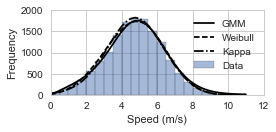

In [72]:
%%time
x = arange(0, max_speed, 0.5*BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max(), BIN_WIDTH), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed)*BIN_WIDTH,'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em, BIN_WIDTH))

In [73]:
bin_width=BIN_WIDTH
bins = arange(0, df.speed.max()+bin_width, bin_width)

density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
density, _ = np.histogram(df.speed, bins=bins, density=True)
print(sector_r_square(density*bin_width, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*bin_width, density_expected_beta))

D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


0.996076895444
0.995492842209


In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in  x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAlNX6wPEvAwzLsCmopIWKe5oJuIs7uHXNhQjRQKt7
Ta9JmpZbbriWV/NeUzStTBQ1zVJcS03NFdk0N1xQFBEQRNlkGeb9/cGPEZRgVF4Y4Hz+ct6NZ2bk
4ZzzPue8BpIkSQiCIJQhRUUHIAhC1SMSiyAIZU4kFkEQypxILIIglDmRWARBKHMisQiCUOZkTSzn
zp3Dx8fnme2HDx/Gw8MDLy8vfvrpJzlDEAShAhjJdeG1a9eya9cuzMzMimzPzc1l0aJFbN++HTMz
M7y9venVqxd2dnZyhSIIQjmTrcXi4ODAihUrntl+48YNHBwcsLa2RqlU4uLiwtmzZ+UKQxCECiBb
i6Vv377ExsY+sz09PR1LS0vta5VKRXp6eqnXCwsLK9P4BEHQnYuLy3MdL1ti+TsWFhZkZGRoX2dk
ZBRJNCV53jcnt7CwML2LCfQzroqKKTwqkYMht4lPzsDeVkWDulacOh8HQEZmJipzc+KTM7FSKTE3
zf91uJOQ/4fO2EiBjVkeyfG3uH71CqlJt8l+FMvD5LukP0qCv50NY4C5ZQ0UCgW5ubkYm5hjYWmD
qcoaU3NLlFZ1UZpaUtPGAqWpGelZhkgKY0xNzbCyUGJhac2DVDWGRsa8UtsaQyNjFApD4pMzAbC3
NQcgPjmTXLUGYyNFkW2FjylQ186Cz3zavtBn+CJ/1Ms9sTRq1IiYmBgePnyIubk5oaGhfPjhh+Ud
hlANhEclErj3kvb1vaR0IqISiyQRgFy1htSMHEyNDUiKv8mtC+Hcj71M8t0oMh7ee+a6ZpY1qNfw
DfLyNCTcvoS1XV1s7RtgXashpjUdad6qLVZWFgBkZuUCBkV+3tPbMrNySX6Uja21KZImB5W5Ocbm
+ccYK5+cZ6UyBgyKvE5+lI2VSvm3xxTo3d7hOT+9l1NuiSU4OJjMzEy8vLyYOnUqH374IZIk4eHh
QZ06dcorDKGKK9xCSUnLRmmkKDaJFGzLSH3AnQvHiL0WQlLMOXKyM7XHGpuosKvbiNzsx6Q+iEeS
NGBgQI/BH9PMqRfqnGzat7In/kEu8Q8ysK+pon5dK2LiUrWvC36hD4Xc/tttjV+tQe/2+efduJNI
XTuL5z6vtJ/n3Ky2/B9+IbImlldffVV7O3ngwIHa7b169aJXr15y/mihGnq6hZKWkfP//zLVJhJj
IwWpD+9zO+I4V88dJenuNe3x1rZ1adqmJ680eJ0arzTD2tKUdfN9kSQNzVq0ov/Ad1DVbcdjVP//
C/u6zr+wxR1X3Lanu4y6nvcix8ip3LtCgiCXgyG3i7w2NlJoWyhKIw03L57i/Kk9xF4LQ5I0GCgM
ebWxE46vd2TIkLdJyzbl9z1beJRwjcVzJ+PcrDZdm2hwdnamZcuWFfSuKieRWIRK6+mB2ei7DzEz
KTomcS8+iUthu7gVuY/HGY8AaNz8TVp3GoBVvTa83tSRXu1e46/T+5g/YzLJyclYW1tT384QoNgC
T6F0IrEIlVJxA7OP0nOQJDA3NeJx+iMijm0j8s9fyM3OxFRlRdd+w/n436N5d2B3IL/bYWdnx4cf
juDQoUNYWFjg7+/P+PHjsbGxqai3ViWIxCJUSk93e+D/75I8eEh4+C+cO76D3JwszC1rMO6Tz5k/
azIqleqZczQaDadOnWLAgAEEBATg4FC+d0+qqmqVWJ5uOrtVwGi58GJK6/ZIkkTc1dP8seN/ZKQm
obKypb/nv/l88ni6tGlQ5FpxcXH88MMP9O3bl4YNGxIREUGTJk0wMHj2Nq3wYqpNYimu6Vzw+mWS
y5kzZ5gwYQKNGzdGkiTUajW+vr4MGDCg2OPj4uK4cuWKuCv2HErr9qSmJHBkx/+IvngSQyNjZs+e
zZQpU56Zpwb539eQIUO4d+8eFhYWtG3blqZNm5bn26kWqk1iKa7pDPn3+1+21dKxY0e+/vprIL+S
2MfHh4YNG9KiRYtnjj19+jTR0dEisTyHv+v2PErP5urZYE7s+ZbcnCxebdSG/65YydD+nYu9zoYN
Gxg9ejS5ubksXbqULl26yB16tVVtEkt8ckbx2x8Uv/1FqVQqvLy82Lt3Lxs3biQ+Pp7ExER69eqF
n58f3377LVlZWTg5OWFpack333yDJElkZGSwdOlSGjZsWKbxVAXFfXdG5HI2eAnRfx3FVGXFkJFT
+PzTsbg0L77YcubMmcyfPx8bGxt27txJ3759xfwzGVWbxGJvq+Je0rOTHe1rPjug97JsbW357bff
6NevH56enmRnZ9OtWzcmTpzI6NGjiY6Opnfv3mzatIklS5ZQp04dVq9ezf79+xk7dmyZx1MZlVRB
+yAhhuAfZpGSeBtXV1e2bt1K3bp1S7xe69atad68OTt37hRdn3JQbRKLW3uHIv30AnLMoYiLi8PJ
yYm//vqL06dPY2FhQU5OzjPH1alThwULFmBubk5CQgLOzs5lHktl9PSYitLIgORHWYApdy4f4+DW
JeTmZDFi1Bh++PZ/GBsbF3sdtVpNWFgYHTp0wNPTk0GDBqFUKos9Vihb1WZpSudmtfEZ8Dp17SxQ
KAyoa2eBzwDdS7J1lZ6ezrZt27C0tMTS0pKlS5fywQcfkJWVhSRJKBQKNBoNkN88X7hwIYsXL6Z2
7dqIZ8fle3pMxdzUmJpWSkJ++5F9gfMwUChYvHwtG38IKDGp+Pj44OrqyuHDhwFEUilH1abFAvnJ
RY7by6dPn8bHxweFQkFeXh7jx4+nYcOGTJo0icjISJRKJfXr1ycxMZGmTZsSEBBAy5Ytefvttxkx
YgRmZmbY2dmRmJhY5rFVRk+PqUiSROhva4k8uh1HR0f27NlD8+bN//b8vLw8Ro4cyZYtW+jSpQvt
2rWTO2ThKdUqscihQ4cOnDp1qth9u3btemZbnTp1OHDgAABvvfWWrLFVVoXHwzSaPA5v+5oLZ/ZQ
p15D/vzzzxLHUzQaDaNGjSIoKIjOnTuzb98+ndf7EcqOSCxChStuMaZ7Senk5ak5ELSIqxGHqf1q
EzZt21nqIO2PP/7Ixo0b6dixo0gqFUgkFqFCFVf8di8pnXYt7FgwfRxXI47RoMmbrA/aTve2jUu9
nq+vL/Hx8Xz00UdYWVnJGbpQApFYhApVXPGbJEksmz+VSxHHcHNz49dffy12nk9hkZGR1K5dm7p1
6zJt2jS5whV0JBKLUKGKK347vf8Hwk7soX379uzcuRNzc/Niznzi7t27DBgwACMjIy5fvlxqEhLk
V21uNwv6yd62aBK4cHoPZ34PpGbtegQHB5eaVB4/fszgwYO5d+8eEydOFElFT4jEIlQot0IFijcv
n+HQ9mWYqqz4bsN2atcuuTRAkiT+9a9/ERoayvvvv8+ECRPkDlfQkUgsZeDOnTv4+fnx7rvv4uvr
y+jRo7l27RorVqygRYsWJCQkaI9NTk6mZcuW7Nixg9jYWJo1a8a3335b5HpjxoypsiuXhUcl8lVg
KJ8uP8pXgaEA+Ax4HU16LHt/nIOhoTEB64IY3LdjqdcKCgpi06ZNdOzYkYCAALHsgR6pMmMsn332
Gdu2bSvTa3p6erJkyZISj3n8+DFjx45l3rx5ODk5AXD+/Hn8/f1p3749DRo0YN++fYwaNQqAvXv3
8sorr2jPd3Bw4MCBA4wePRqAlJQUYmJiquQjZ/9u6YqBnezZ8e001LnZ/PzzzwwZolt9T48ePRg8
eDBLly7FxMRErrCFFyBaLC/pjz/+oGPHjtqkAvkT3jZs2ADAgAED2L9/f5Hje/bsqX1do0YNbG1t
uXHjBgD79u2

0.0283060191631 0.195191016892
6.25 5.5
Wall time: 11.3 s


In [75]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

0.00793161041258
0.00924048630129


D:\ProgramData\Anaconda3\lib\site-packages\lmoments3\distr.py:433: RuntimeWarning: invalid value encountered in power
  np.where(k == 0, 0., (1 - h ** (-k)) / k),


In [76]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = N_VM_DIR

In [77]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [78]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

Direction Distribution Comparison
0.9971339868
0.998877167347
Wall time: 7.5 s


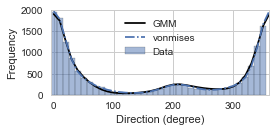

In [79]:
%%time
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', label='vonmises')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, y[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

In [80]:
phi = phi_from_speed_dir(df.speed, df.dir, speed_params, dir_params)
phi_data = [cos(phi), sin(phi)]
n_vM_phi = N_VM_PHI

In [81]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [82]:
# print(result)
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

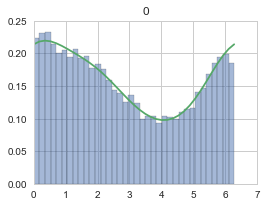

In [83]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x,connection_params)
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

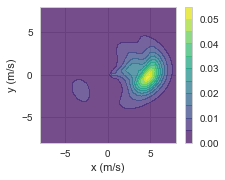

In [84]:
X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [ np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [ np.arctan2(y, x) for x,y in coords]
al_pdf = angular_linear_pdf(x, alpha, speed_params, dir_params, connection_params, cartesian=True)
al_Z = al_pdf.reshape(XX.shape)

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [85]:
gof_df(al_pdf, kde_result, BIN_WIDTH)

D:\我的坚果云\wind_speed_analysis\helpers\app_helper.py:79: RuntimeWarning: divide by zero encountered in true_divide
  Chi_square = sum(error_array/gmm_pdf_result)
D:\我的坚果云\wind_speed_analysis\helpers\app_helper.py:80: RuntimeWarning: divide by zero encountered in true_divide
  Chi_square_2 = sum(power(kde_result/gmm_pdf_result-1, 2))


R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0 -1.148347  0.544        inf          inf  0.000097      0.243       2.717

In [86]:
speed_params, dir_params, connection_params

((0.21874129433763143,
  -0.22464461686368062,
  1.3676989932449055,
  4.3741424998775198),
 [[2.0679841549229003, 0.17366034941858749, 0.42755121222331549],
  [4.8107013195723241, -2.6787899438152381, 0.095521286169598305],
  [0.78447625987329539, -1.1420322341975029, 0.075925760804764555],
  [11.820232477277413, 0.011048069276913892, 0.40100174080232165]],
 [[0.32387068321986179, 1.2902281901684196, 0.30849131657523088],
  [0.95354689296033301, -0.023266134203820839, 0.37699580520419301],
  [0.59196499269674141, 1.9914550263998869, 0.31451287822057611]])

In [87]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.012875  0.994768      0.985568
(1997, 2002)  0.010262  0.997762      0.988102
(1991, 1996)  0.036812  0.991603      0.979241

In [88]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

#     x = arange(0, df['speed'].max()+1)
    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANkAAAC3CAYAAACfQPtcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlcVNX7x9+zsO87iIKCioAogiK4lrkvlZpr4dpiP7P6
Wn7NFitt+7ZvX0uzsuyrqeVuZu4oogLKIosKCIiy7zvMzP39MTlFLIIyDOB9v16+invPnfucmfnM
Oee5z3keiSAIAiIiIlpDqmsDREQ6O6LIRES0jCgyEREtI4pMRETLiCITEdEyoshERLSMzkQWHR1N
cHBwvePHjh1j+vTpzJo1i+3btwOgUqlYvXo1s2bNIjg4mLS0tLY2V0TkjpHr4qbffPMNe/fuxcjI
qM7x2tpa3n33XX755ReMjIyYM2cOo0aN4sKFC9TU1LBt2zaioqJ47733+Oqrr3RhuohIi9HJSObi
4sIXX3xR73hycjIuLi5YWFigr6+Pv78/4eHhREZGMnz4cAB8fX25dOlSW5ssInLH6GQkGzduHBkZ
GfWOl5WVYWZmpvnbxMSEsrIyysrKMDU11RyXyWQoFArk8sbNj4yMbF2jRUSagb+/f71jOhFZY5ia
mlJeXq75u7y8HDMzs3rHVSpVkwK7RUMdjoyMbPB4Z6Mj91OpVCGTNW+S1Rb9VKkErqQXEhabSdil
TDLzypFKYNPqcViZG1JeWYuxoZwLFy40eH27Epm7uztpaWkUFRVhbGxMREQEixcvRiKRcPz4cSZO
nEhUVBS9e/fWtakiWuSNjWeprlES2NeJIB8nnGxNtHIfQRCQSCSUlNfw3McncHE0w8XBDFdHc1wc
zejRxRw9uYxdJ5LYdCAeAEN9GSN8nbl/YDfMTfQBMDHSa/I+7UJk+/bto6KiglmzZvHSSy+xePFi
BEFg+vTpODg4MGbMGEJDQ5k9ezaCIPDOO+/o2mSRViblRjHllbV4udkgCAKX0wpISC3g+/1xuDqa
MWW4O+MCXVvlXuWVtWz5IxFBgCcf9qGgpApBELiQmMOFxBxNu5cXBBDk48QgLwcycsoI8nGif287
DPRkLbqfzkTWtWtXjYt+ypQpmuOjRo1i1KhRddpKpVLWrFnTpvaJtB2CIPD1zhgSUgv48sX7eWvJ
UIrLqjkfl8XZS1lcvJJDTmEFAFU1Ct7ceBavHjb4uNtQq2z+JhKVSuBYxHV+OBBPUVk1znYmVNd6
0d3JnE2rx1FWWUt6VglpWaWkZ5ZQq1AC4OJoznOzB9xx/9rFSCZyb3MmJpOE1AKCfJxwdTIHwMLU
gDGDXRkz2JXKagU1teovfFpmCfEp+VxKzmf7ETA3liE3y2agp0OT90jLLOGLHVFcTivEQF9G8ARP
Hh7pjv7fRiVTIz28etjg1cOmVfsnikxEp9QqlGw6EIdMKmHBJK8G2xgZyDEyUH9VPVyt2frWROKv
FRCZkM1vZ67x5sazvLd0GN5u9cVxa90lkcDV60UM93Vm4WRv7KyM6rXVFveUyPaGJHPkbC5y81z6
97LTtTkiwP7T18jKr+DB4W50sTO9/QWAsaEeAz0dGOjpQDeLCnIqzfDqYQ3AzdwynGxNqKpR8uux
q+QWVfKvOX64OJqz/qUHcLTRjhOlKe4ZkQmCQHZhBdeyq3n16zMM9nZkwWQvutqb3f5iEa0hkYCt
hSGzx3rc0fUOlnpMfMAbgKz8cp79+AR9XK1IzyqlsLQaa3NDSitqMDPW14nA4B4RmUolIJVKeOIh
HyzlJUSmCpyLyyIiIZsFk715eKS7rk28Z3l4ZE8mDXVDT373wUcSiQQPFyuir+ahrydjzlgPpt3X
E0MD3X7NO73IrmeX8u4P4Syf40fPbpa4ORryyEQ/zl7K5Pt98XR3Uo9kOQUVVNYocHEwQyKR6Njq
zs+N3DLSMksI8nFqFYEBOFgb89aSIVy8kouroxk2Fm237mqKTi2yotJq3tx4luyCCtKzS+jZzRJQ
/+IF+XQhwMtRE1mwP/Qau04k0cXWRPMQtLeLFVKpKDht8P2+OM7FZfHWkiGtuj6WSCT4edi32uu1
Bp1aZG99f47sggpmj/Fg1ECXeuf/Hrrj425DTkEFkYnZ7DyRxM4TSTjZmLB+1QNIJBKqqhU6n3Z0
FqKv5HIuLgtvNxv69bTVtTlap1N/ay6nFXKff1fmjrv9onqQlyODvByprlUSfTWXs7GZ1NSqNFPH
l9adprJKQb9edvi422BvbYydpVG7mZJ0FGoVKtbvjkEigccf7HtPTM07tci83Wx4dqZviz5IAz0Z
AV6OBHg5ao4pVQK2FkbE5Obxe1gqv4elAjByQFdefEwdnPrku0cwM9Zj0tAejBzQtdkBrvca+06l
cD27jAlB3TXT985OpxbZq4sGoydvWZxZQ8ikEl5dNBilUkVSRhHx1wooKq2mh7MFoI4alwDJGcV8
svUiPx++wswHenO/vyi2f2JuokcXWxOCJ3rq2pQ2o1OLzPQ20dEtRSaT4uFqjYerdb3j61eNJqew
gl+OXeXwuTQ+23YRqVTCqIHdWtWGjs7oAFfuH+iC7B5yKHVqkbU19lbG/N/0/swY1ZuDYdcY7usM
wNHwdCqrFYwe5HLPOk/iUvK5nl3KmMGu95TAQBSZVrCzMmLeRHUcniAI7Dh6hRu55Ww5lMikoW5M
HtYDC1MDHVvZdiiUKtb9Gs317FI8XK3o0cVC1ya1KeKCQctIJBL+88xwZo/xACT8fPgyi9b+wa4T
Sbo2rc04EHqN9KxSxg52vecEBuJI1iZYmBrw6Pg+TL+/J0fC09l9Mhnbe8T1X1hSxZZDiZga6RE8
4d5xdvwdUWRtiKGBnMnD3JgQ1F0dGctfWzE6K9/vj6OiSsHT0/vdU1PkvyOKTAfIZFIKS6v4745o
utiZsmiKt65N0hpD+nWhqLSacYHddW2KzhBFpiPMjPVJSC0gMa2AeRM9kXey52m3RujAvk4M9nbs
1KP17ehcn2wHQi6TMmKAM8VlNVy4nHP7CzoQgiDw7g/h/HLsKipV554ONwdRZDrk1oPqYxHXdWxJ
6/LbmVTCYjOJvpqra1PaBaLIdEjPrpZ0czDlfFwWZZW1ujanVUjPKuG7vZcwM9bn+dkD7pmtQpXV
ikbPiSLTIRKJhCnD3Jg0tAcKhUrX5tw1tQolH/4vkhqFimUzfe+ZHQqpmSU8tvpgo+dFx4eOmTCk
h65NaDUiEnK4drOEcYGuBPk46dqcNmPPyWRqmviRFEXWDlCqBGKTcunm0H62zDfGkfPpbDtyGSsz
Q+wsjbD9818vF0uCfJx466kheLha6drMNqO4rJqTUWlY9UwHujbYRpwutgNOXczgtfVh/HEuXdem
3Jb7/bsysI8Dl9MKCIm6wc4TSWzYHcvRcLXzpn9vuw4VBB0en8Xab89RVlFzR9f/HpaKYJNKlXVC
o206zrvRiQnwdkRfT8bxyOvMHtO7Xbu8ZTIpT03rx+MP9aWwtJrcwkryiiqxs27fI3BD1NQqWfdL
NHnFVWw/erXFQQEKpYoDYVfRc7+Gkdyw0Xb31Ej2/b44PtubSUVV+/LkGRvqEdTXicy8ci6nFera
nEb58KdINh9MQKUSkMmk2Foa4dnDmuEDnOnzjz12HYHfzlwjr7gKUO/Yzi6oaNH1odE3KTW+AvIa
pvQZ3Wi7e0ZkqZkl7D6ZRGGZkvPx2bo2px6aZ2aR7fOZ2Y3cMk5ezCDhWkGncMtXVNWy/chVTAzl
PPmwDwqlip8ONj7la4g9pxORO13DWG7MxN6jGm13T4hMEAS+3XMJ1Z8FQE5H3dCtQQ3Qv5ctVmYG
XEjMQaVqfqWStuJWXpPxQa1TvkjX7DqRTGlFDdPu78WkoT1w72rBiQsZJF0vatb1l9MKuKaIQiJX
8LDXWIz1Gp8

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.055825      0.228673  0.981094      0.978515   

              r_square_weibulll  
year_lim                         
(1991, 1996)           0.984457

Wall time: 23.2 s


## 6.4 Sectoral Comaprison

In [89]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

(9.6327306132806214, 601.02469616638314, 8.141514007022824, -0.052843220454860118, 274.01896016990582, 0.97393813899781623, 0.9759428975364457)
Wall time: 10.5 s


In [90]:
al_params = [speed_params, dir_params, connection_params]

In [91]:
%%time
incre = max(SECTOR_LENGTH, 10)
al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(al_density_collection, len(df)))

(15.992309670367792, 601.03634731895909, 13.614177133859192, -0.058515419303438065, inf, 0.92816617777687382, 0.93369185640942198)
Wall time: 3min 28s


D:\我的坚果云\wind_speed_analysis\helpers\app_helper.py:67: RuntimeWarning: divide by zero encountered in true_divide
  Chi_square = np.sum(power(1 - densities/densities_expected, 2))


In [92]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+bin_width, bin_width)
        density, _ = np.histogram(sub_df['speed'], bins=bins, density=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+bin_width],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density*bin_width, density_expected_gmm)
        
        density_expected_weibull = weibull_min.cdf(bins[1:], *weibull_params) - weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed+bin_width, bin_width), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

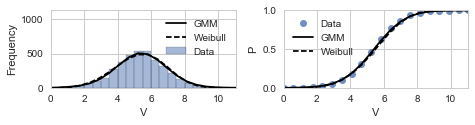

5.0 (-5.0 - 15.0) degree
data size: 3785 weight 0.25910460021905807
GMM Weibull
R square 0.992100985731 0.983035920926
max diff: 0.0189281843596 0.0413823472739 speed value: 6.39699708353 5.81545189412 y gmm 0.74857511815
 


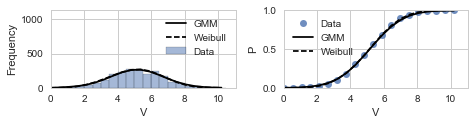

25.0 (15.0 - 35.0) degree
data size: 2114 weight 0.14471522453450164
GMM Weibull
R square 0.974386033296 0.976006312148
max diff: 0.0217825921867 0.010945633422 speed value: 6.98002113986 3.2215482184 y gmm 0.874622327397
 


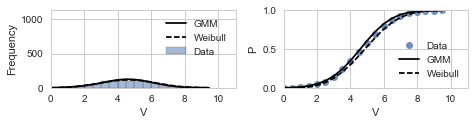

45.0 (35.0 - 55.0) degree
data size: 950 weight 0.0650328587075575
GMM Weibull
R square 0.972917107614 0.987153292914
max diff: 0.0325242412472 0.0558765460946 speed value: 5.97804242347 4.4835318176 y gmm 0.825155820195
 


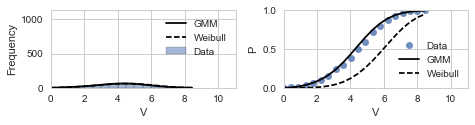

65.0 (55.0 - 75.0) degree
data size: 502 weight 0.03436473165388828
GMM Weibull
R square 0.921891098221 0.963035474318
max diff: 0.0616521184568 0.366081436348 speed value: 4.890631054 5.33523387709 y gmm 0.653285584592
 


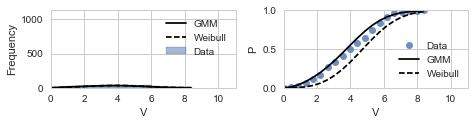

85.0 (75.0 - 95.0) degree
data size: 298 weight 0.02039978094194962
GMM Weibull
R square 0.754075898644 0.75888715425
max diff: 0.0831825844351 0.166338127806 speed value: 4.85677977825 3.97372890948 y gmm 0.730833591147
 


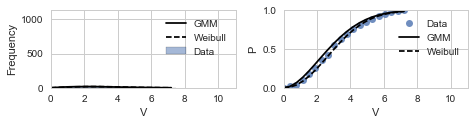

105.0 (95.0 - 115.0) degree
data size: 142 weight 0.009720700985761227
GMM Weibull
R square 0.841783157533 0.887261809167
max diff: 0.0641790477452 0.045983903034 speed value: 2.65304478333 3.03205118095 y gmm 0.493756512534
 


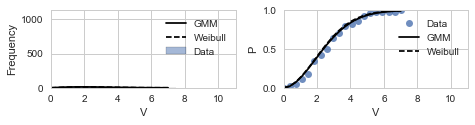

125.0 (115.0 - 135.0) degree
data size: 91 weight 0.0062294633077765605
GMM Weibull
R square 0.818411966095 0.836602533815
max diff: 0.0711727869063 0.078047586401 speed value: 1.47700167415 1.47700167415 y gmm 0.24699696273
 


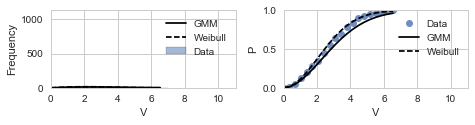

145.0 (135.0 - 155.0) degree
data size: 107 weight 0.007324753559693318
GMM Weibull
R square 0.735290001489 0.760877378745
max diff: 0.100564383026 0.0439167820262 speed value: 4.47755849325 2.06656545842 y gmm 0.805977673049
 


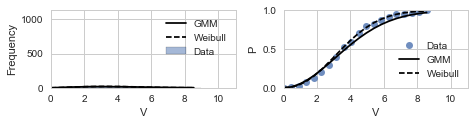

165.0 (155.0 - 175.0) degree
data size: 177 weight 0.012116648411829134
GMM Weibull
R square 0.794689838255 0.867395890037
max diff: 0.0880489772047 0.0347431060304 speed value: 4.9500507981 4.05004156208 y gmm 0.708561192287
 


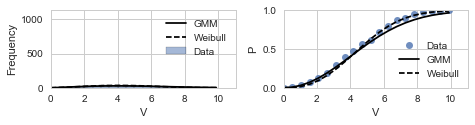

185.0 (175.0 - 195.0) degree
data size: 352 weight 0.024096385542168676
GMM Weibull
R square 0.841015292072 0.847269067819
max diff: 0.083369474263 0.0668714402073 speed value: 6.76689740622 3.64371398796 y gmm 0.791630525737
 


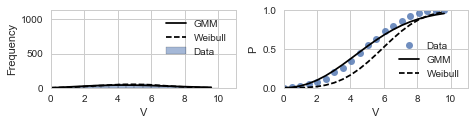

205.0 (195.0 - 215.0) degree
data size: 488 weight 0.033406352683461114
GMM Weibull
R square 0.832766212774 0.93281968388
max diff: 0.0788894348272 0.213908296582 speed value: 7.57406558157 5.04937705438 y gmm 0.853487614353
 


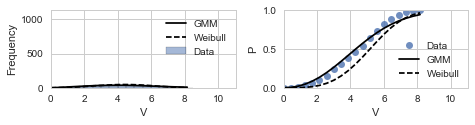

225.0 (215.0 - 235.0) degree
data size: 403 weight 0.027587623220153342
GMM Weibull
R square 0.811217736543 0.874532173921
max diff: 0.0802452315568 0.165580706938 speed value: 7.29933475113 3.86435369178 y gmm 0.89742226224
 


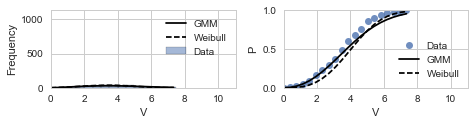

245.0 (235.0 - 255.0) degree
data size: 283 weight 0.019372946330777657
GMM Weibull
R square 0.78850452794 0.889345715318
max diff: 0.124511513258 0.143868484422 speed value: 5.02585904311 3.86604541778 y gmm 0.737679299462
 


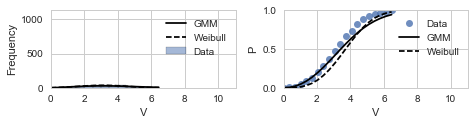

265.0 (255.0 - 275.0) degree
data size: 245 weight 0.016771631982475357
GMM Weibull
R square 0.785249720338 0.912402326462
max diff: 0.124289978642 0.160940601722 speed value: 4.75853432101 3.39895308643 y gmm 0.769587572379
 


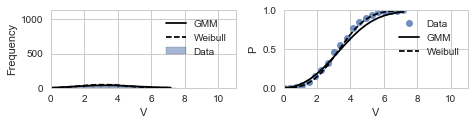

285.0 (275.0 - 295.0) degree
data size: 298 weight 0.02039978094194962
GMM Weibull
R square 0.843921510486 0.951424034415
max diff: 0.111740590921 0.0554445136226 speed value: 4.52681711924 3.01787807949 y gmm 0.743964107066
 


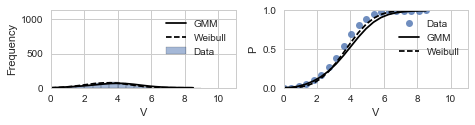

305.0 (295.0 - 315.0) degree
data size: 483 weight 0.03306407447973713
GMM Weibull
R square 0.845876005612 0.971175941742
max diff: 0.156508656801 0.101999573054 speed value: 4.48183464939 4.03365118445 y gmm 0.657155939472
 


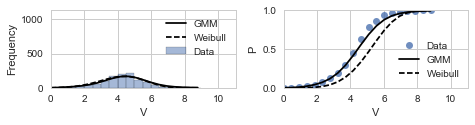

325.0 (315.0 - 335.0) degree
data size: 1112 weight 0.07612267250821468
GMM Weibull
R square 0.930849057404 0.938045267761
max diff: 0.0907560569847 0.312626991316 speed value: 5.08909165138 5.08909165138 y gmm 0.689819482584
 


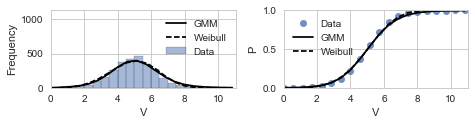

345.0 (335.0 - 355.0) degree
data size: 2778 weight 0.1901697699890471
GMM Weibull
R square 0.977122124665 0.971903110519
max diff: 0.0454549694302 0.0338169886555 speed value: 6.27855871861 6.27855871861 y gmm 0.809836607244
 
Wall time: 41.8 s


In [93]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

0.937469295993901 0.9546338434057663


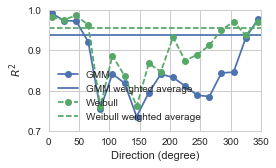

In [94]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.051219902456145966 0.08713373509132455


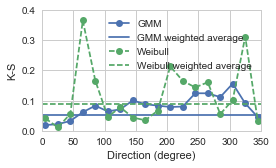

In [95]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

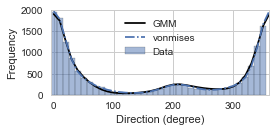

In [96]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [97]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [98]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [99]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [100]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL,
          'bin_width': BIN_WIDTH}

print(bandwidth, FIT_METHOD)

0.5 square_error


## 7.1  Result Variability

In [101]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

Wall time: 16.9 s


number of estimated clusters : 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000195FD6A0>]], dtype=object)

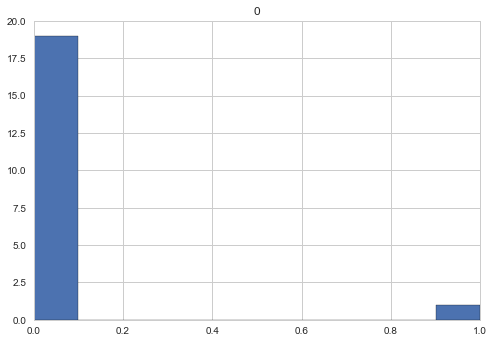

In [102]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected using
ms_bandwidth = estimate_bandwidth(X)

ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

pd.DataFrame(ms.labels_).hist()

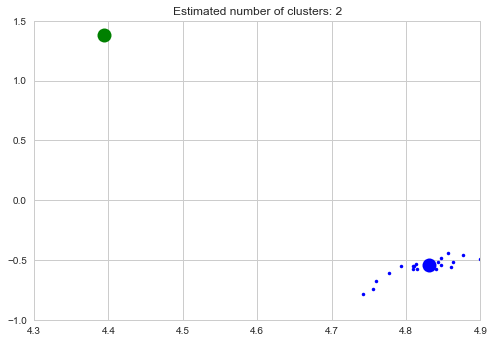

In [103]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.399   4.809  -0.553  1.487  1.599   0.423
2  0.344   4.289   1.584  1.899  1.934  -0.393
3  0.257  -0.846  -1.436  3.544  2.218   0.129

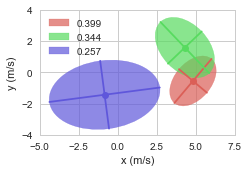

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.995  0.011      0.107      536.383  2.380131e-07      0.012       0.134

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.995  0.014      0.110      541.097  2.399727e-07      0.012       0.135

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.386   4.861  -0.562  1.511  1.583   0.419
2  0.348   4.282   1.555  1.936  1.920  -0.345
3  0.266  -0.787  -1.443  3.544  2.274   0.117

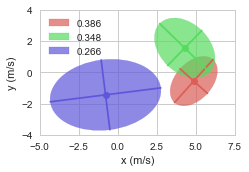

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.013      0.128      422.339  2.964321e-07      0.014       0.150

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.014      0.113      452.756  2.780681e-07      0.013       0.145

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.378   4.760  -0.675  1.536  1.623   0.469
2  0.364   4.397   1.362  1.803  1.918  -0.379
3  0.258  -1.058  -1.426  3.425  2.464   0.194

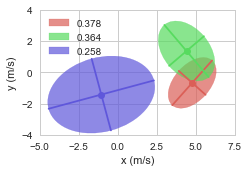

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.015      0.171      651.918  3.111815e-07      0.014       0.154

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.017      0.146      587.536  2.514042e-07      0.012       0.138

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.392   4.777  -0.608  1.384  1.607   0.389
2  0.361   4.343   1.597  2.111  1.920  -0.400
3  0.247  -1.002  -1.632  3.409  2.217   0.113

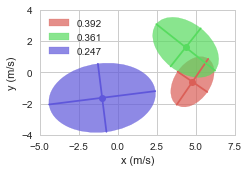

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.012      0.109      373.694  2.521094e-07      0.013       0.138

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.014      0.101      408.370  2.692104e-07      0.013       0.143

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.363   4.742  -0.784  1.602  1.657   0.541
2  0.329   4.533   1.165  1.634  1.781  -0.364
3  0.308  -0.327  -0.671  3.749  2.870   0.403

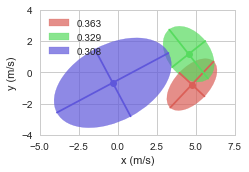

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.016      0.163      471.358  2.909365e-07      0.013       0.149

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.017      0.162      410.621  2.881572e-07      0.013       0.148


Cluster Number: 1


weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.377   4.393   1.381  1.922  1.906  -0.388
2  0.366   4.798  -0.623  1.434  1.589   0.455
3  0.256  -1.005  -1.483  3.414  2.338   0.139

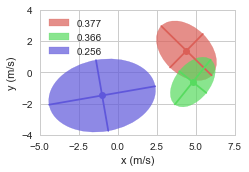

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.993  0.014      0.151      762.978  3.472222e-07      0.014       0.162

R_square    K_S Chi_square Chi_square_2           MSE RMSE / Max RMSE / Mean
0    0.994  0.013      0.132      615.834  2.595546e-07      0.013       0.140

In [104]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [105]:
# %%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 10956.0 3652.0
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    1.913144   7730.833510  0.139190  0.000014    0.092646     1.038038   
1    1.929500   6564.441405  0.143835  0.000015    0.095044     1.052169   
2    1.836503   5982.592970  0.140283  0.000014    0.093207     1.039739   
3    1.869982   6411.862697  0.141461  0.000015    0.093020     1.049868   

   R_square  
0  0.688866  
1  0.678753  
2  0.681453  
3  0.680702

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    2.070413  10358.890692  0.141928  0.000015    0.094814     1.052744   
1    1.698017   5592.878805  0.130918  0.000014    0.089783     1.032953   
2    2.124532   9777.248541  0.150955  0.000015    0.096091     1.081105   
3    2.081395   8985.066874  0.141328  0.000014    0.096026     1.042531   

   R_square  
0  0.671855  
1  0.689020  
2  0.674405  
3  0.681770

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.386939    594.407765  0.036873  0.000001    0.025341     0.284286   
1    0.366255    673.625595  0.035019  0.000001    0.024672     0.276442   
2    0.373164    565.067769  0.035011  0.000001    0.025563     0.283624   
3    0.349353    568.421772  0.033240  0.000001    0.024823     0.277977   

   R_square  
0  0.976622  
1  0.977514  
2  0.976409  
3  0.977859

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0    0.442112   1054.174437  0.040931  0.000001    0.026980     0.299665   
1    0.429592    540.280970  0.037777  0.000001    0.029518     0.331671   
2    0.357480    512.480161  0.034267  0.000001    0.025861     0.295629   
3    0.503720    948.041794  0.030865  0.000001    0.029116     0.323827   

   R_square  
0  0.973572  
1  0.969267  
2  0.975290  
3  0.968245

  
Number of gaussian 3
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.119631    648.543225  0.011907  2.294867e-07    0.011741     0.131867   
1    0.118517    613.722031  0.012795  2.589674e-07    0.012369     0.140203   
2    0.106636    642.518375  0.011367  2.505323e-07    0.012312     0.137816   
3    0.121231    609.549173  0.013038  2.476015e-07    0.012514     0.137118   

   R_square  
0  0.995005  
1  0.994231  
2  0.994477  
3  0.994516

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.173210    640.442949  0.024387  5.200180e-07    0.018047     0.198938   
1    0.186236   1345.277485  0.021332  5.514672e-07    0.018748     0.204331   
2    0.162825   1418.850711  0.015290  4.193282e-07    0.016029     0.178505   
3    0.180963    541.383622  0.019265  6.635567e-07    0.018913     0.224007   

   R_square  
0  0.988090  
1  0.988249  
2  0.990758  
3  0.985632

  
Number of gaussian 4
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.051906    269.130604  0.006642  9.891679e-08    0.007616     0.086566   
1    0.049552    308.277133  0.007624  1.085684e-07    0.008296     0.090711   
2    0.053640    300.178132  0.008428  1.156802e-07    0.008358     0.093705   
3    0.047805    297.738814  0.005157  1.013054e-07    0.007830     0.087729   

   R_square  
0  0.997824  
1  0.997588  
2  0.997449  
3  0.997775

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.128462    544.089023  0.011528  4.989815e-07    0.018208     0.194933   
1    0.110699    358.271140  0.018783  5.851188e-07    0.017706     0.210951   
2    0.131641    417.388786  0.016295  5.342714e-07    0.018148     0.201121   
3    0.119920    744.646015  0.011364  5.328427e-07    0.017455     0.200586   

   R_square  
0  0.988961  
1  0.987453  
2  0.988283  
3  0.988158

  
Number of gaussian 5
Train


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.039963    6671.303421  0.005624  6.381366e-08    0.006191     0.069569   
1    0.055135    9880.702212  0.006108  6.612033e-08    0.006343     0.070883   
2    0.089545  298191.867096  0.004857  5.911016e-08    0.006081     0.066888   
3    0.042866    4169.185108  0.007134  5.676683e-08    0.005807     0.065641   

   R_square  
0  0.998602  
1  0.998536  
2  0.998705  
3  0.998735

Test


Chi_square   Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    0.151055   18357.822961  0.016802  3.661990e-07    0.015149     0.166707   
1    0.082273     401.766980  0.020743  3.332503e-07    0.014170     0.158580   
2    0.156337    7170.014365  0.022545  3.607774e-07    0.014163     0.165980   
3    0.179041  122056.375524  0.019429  2.970408e-07    0.013881     0.149967   

   R_square  
0  0.991795  
1  0.992762  
2  0.991905  
3  0.993653

In [106]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    1.887282   6672.432646  0.141192  1.439525e-05    0.093479     1.044954   
2    0.368928    600.380725  0.035036  1.038007e-06    0.025100     0.280582   
3    0.116504    628.583201  0.012277  2.466470e-07    0.012234     0.136751   
4    0.050726    293.831171  0.006963  1.061177e-07    0.008025     0.089678   
5    0.056877  79728.264459  0.005931  6.145274e-08    0.006105     0.068245   

   R_square  
1  0.682444  
2  0.977101  
3  0.994557  
4  0.997659  
5  0.998644

Test gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
1    1.993589   8678.521228  0.141282  1.460344e-05    0.094179     1.052333   
2    0.433226    763.744341  0.035960  1.292331e-06    0.027869     0.312698   
3    0.175808    986.488692  0.020069  5.385925e-07    0.017934     0.201445   
4    0.122681    516.098741  0.014493  5.378036e-07    0.017879     0.201898   
5    0.142176  36996.494958  0.019880  3.393169e-07    0.014341     0.160308   

   R_square  
1  0.679262  
2  0.971594  
3  0.988182  
4  0.988214  
5  0.992529

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


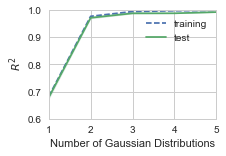

K_S


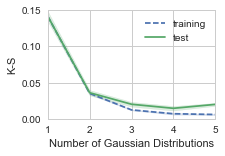

Chi_square


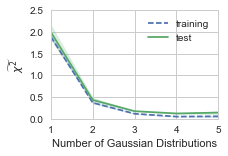

MSE


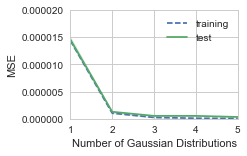

In [107]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [108]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [109]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

18N32E
